# **Motivation**

### 1) Why did you pick this country?

We picked the Republic of Korea because its rise to economic prosperity and political relevance within the global sphere is unprecedented. Prior to the 1960s, the Republic of Korea faced struggles one after another, with the Japanese annexation of the country from 1910-1945, the subsequent poor conditions and resources allocated to the country due to both the annexation and the Cold War's everlasting events (the drawing of the 38th parallel dividing up North and South Korea), and the Korean War from 1950-1953. The Republic of Korea's citizens starved and lived through troubling war/annexation times for decades on end. However, this small republic, newly formed and independent, implemented export-oriented economic development plans, which led to rapid economic growth and transformation, with the Republic of Korea becoming the 11th largest economy in the world in 2016. 

https://www.stlouisfed.org/on-the-economy/2018/march/how-south-korea-economy-develop-quickly 

This drastic rise to economic prosperity as well as the republic's focus on export-oriented economic development plans meant a significant increase in industrial labor and resources used for the production of their exports, with CO2 emissions and other greenhouse gases most certainly being the byproducts of these labor processes. So, we thought it would be interesting to see how the Republic of Korea's CO2 emissions changed over time (expecting a huge and steep spike), and how the Republic of Korea compares to other global superpowers or otherwise small countries in terms of these emissions.

How would Korea's spike in economic and industrial activity affect the republic's CO2 emissions, and were these emissions associated with other variables?

### 2) What are some facts about CO2 emissions for that country?

The Republic of Korea has had a 

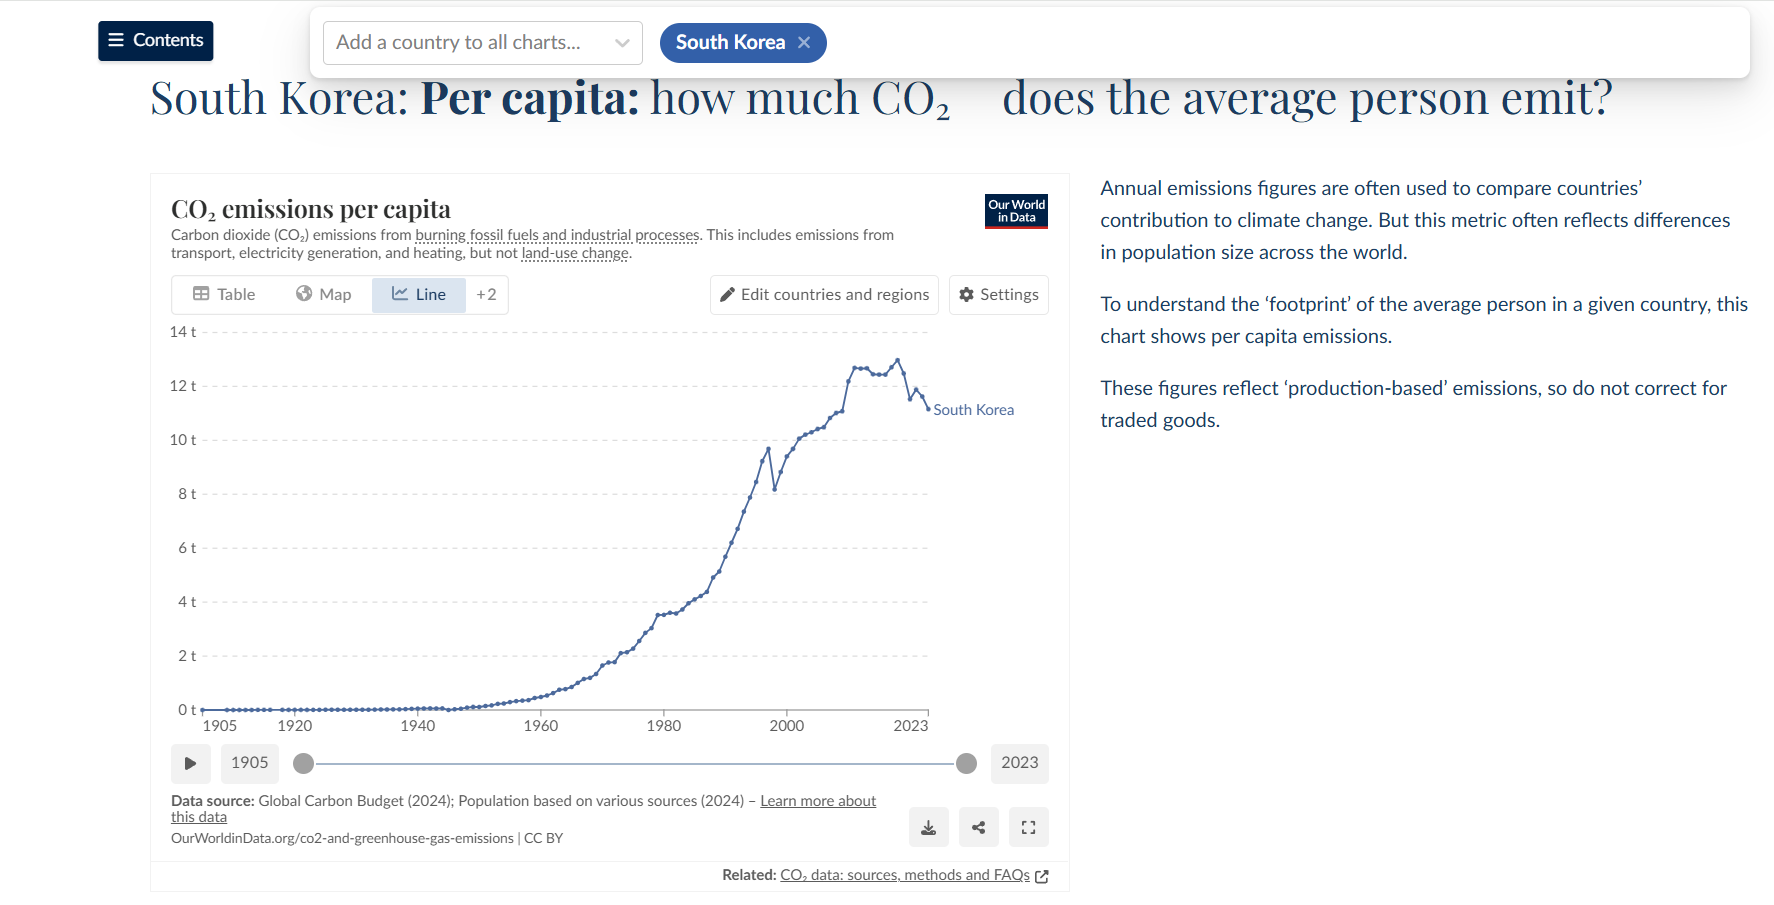

# **Main Research Questions**

### (1) How has the Republic of Korea’s CO2 emissions changed over time? And how does the Republic of Korea compare to other countries (the rest of the world)?
### (2) Are CO2 emissions, temperature, and natural disasters in the Republic of Korea associated?

# **Context**

Now we will describe a bit more background about greenhouse gas emissions and the potential influence of these emissions on public health.

Greenhouse gas emissions are due to both natural processes and anthropogenic (human-derived) activities.

These emissions are one of the contributing factors to rising global temperatures, which can have a great influence on public health as illustrated in the following image:



[source]
According to the US Environmental Protection Agency (EPA) Inventory of U.S. Greenhouse Gas Emissions and Sinks 2020 Report:

Gases in the atmosphere can contribute to climate change both directly and indirectly. Direct effects occur when the gas itself absorbs radiation. Indirect radiative forcing occurs when chemical transformations of the substance produce other greenhouse gases, when a gas influences the atmospheric lifetimes of other gases, and/or when a gas affects atmospheric processes that alter the radiative balance of the earth (e.g., affect cloud formation or albedo).

The Global Warming Potential (GWP) compares the ability of a greenhouse gas to trap heat in the atmosphere relative to another gas.

The GWP of a greenhouse gas is defined as the ratio of the accumulated radiative forcing within a specific time horizon caused by emitting 1 kilogram of the gas, relative to that of the reference gas CO2 (IPCC 2013). Therefore GWP-weighted emissions are provided in million metric tons of CO2 equivalent (MMT CO2 Eq.)

[source]
CO2 is actually the least heat-trapping gas of the greenhouse gases:



[source]
However, because CO2 is so much more abundant and stays in the atmosphere so much longer than other greenhouse gases, it has been the largest contributor to global warming. See here for more details.

It is also important to keep in mind that there is a lag between greenhouse gas emissions and temperature changes that we experience because much of Earth’s thermal energy (and CO2) gets stored in the ocean.

Due to a process called thermal inertia, the heat stored in the ocean will eventually be transfered to the surface of the Earth long after the gases were emitted that resulted in the increased ocean temperature.

See here for more explanation.

Furthermore, rising CO2 levels in the ocean also influence ocean acidity:



[source]
As CO2 levels rise in the ocean, the pH becomes more acidic, which makes it difficult for organisms to maintain their shells or skeletons that are made of calcium carbonate, thus making it more difficult for these organisms to survive and impacting their role in the ecosystem and food chain.

Furthermore, greenhouse gas emissions are believed to influence weather patterns as shown in this report.

Indeed, events with high levels of precipitation which can induce flooding and property damage are generally increasing around the country:



[source]

# **Limitations**

An important limitation regarding this data analysis to keep in mind is the datasets only include countries and years in which countries were reporting such information to the agencies that collected the data. Thus, the data are incomplete. For example, while we have a fairly good sense of CO2 emissions globally for later years, additional emissions were also produced by countries that are not included in the data.

# **What are the data?**

In [1]:
import pandas as pd
import numpy as np
!pip install plotnine
from plotnine import ggplot, aes, geom_line, labs, ylab, theme_linedraw, theme, element_text
import statsmodels.formula.api as smf
from IPython.display import display

  Using cached plotnine-0.15.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached mizani-0.14.2-py3-none-any.whl.metadata (4.8 kB)
  Using cached statsmodels-0.14.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
Using cached plotnine-0.15.0-py3-none-any.whl (1.3 MB)
Using cached mizani-0.14.2-py3-none-any.whl (133 kB)
Using cached statsmodels-0.14.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (10.5 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4 0/3 [statsmodels]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [plotnine]2/3 [plotnine]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
linearmodels 0.0.0 requires Cython>=3.0.10, which is not installe

### In this case study we will be using data related to CO2 emissions, as well as other data that may influence, be influenced or relate to CO2 emissions. Most of our data is from Gapminder that was originally obtained from the World Bank.

### In addition, we will use some data that is specific to the Republic of Korea from the EM-DAT Centre for Research on the Epidemiology of Disasters, which is an agency that collects data on the occurrence and impacts of over 26,000 mass disasters worldwide from 1900 to the present day.

In [2]:
data = {
    "Data": [
        "CO2 emissions",
        "GDP per capita (percent yearly growth)",
        "Energy use per person",
        "Republic of Korea Natural Disasters",
        "ROK Annual Temperature"
    ],
    "Time span": [
        "1751-2014",
        "1801-2019",
        "1960-2015",
        "1936-2025",
        "1950-2022"
    ],
    "Source": [
        "Gapminder",
        "Gapminder",
        "Gapminder",
        "EM-DAT Centre for Research on the Epidemiology of Disasters",
        "The National Oceanic and Atmospheric Administration (NOAA)"
    ],
    "Original Source": [
        "Carbon Dioxide Information Analysis Center (CDIAC)",
        "World Bank",
        "World Bank",
        "EM-DAT Centre for Research on the Epidemiology of Disasters",
        "World Bank"
    ],
    "Description": [
        "CO2 emissions in tonnes or metric tons (equivalent to approximately 2,204.6 pounds) per person by country",
        "Growth Domestic Product (which is an overall measure of the health of nation’s economy) per person by country",
        "Use of primary energy before transformation to other end-use fuels, by country",
        "ROK data about:\n- Droughts\n- Floods\n- Landslides\n- Storms\n- Tropical Cyclones\n- Forest Fires\n- Blizzards\n- Flash Floods\n- Landslides\n- Riverine Floods\n- Heat Waves\n- Mudslides\n- Coastal Floods\n- Ground Movements",
        "ROK National yearly average temperature (in Celsius) from 1950 to 2022"
    ],
    "Citation": [
        "NA",
        "NA",
        "NA",
        "NA",
        "World Bank, Climate Change Knowledge Portal (2025). URL: https://climateknowledgeportal.worldbank.org/. Date Accessed: August 13, 2025"
    ]
}

df = pd.DataFrame(data)
df

,Data,Time span,Source,Original Source,Description,Citation
0,CO2 emissions,1751-2014,Gapminder,Carbon Dioxide Information Analysis Center (CD...,CO2 emissions in tonnes or metric tons (equiva...,NA
1,GDP per capita (percent yearly growth),1801-2019,Gapminder,World Bank,Growth Domestic Product (which is an overall m...,NA
2,Energy use per person,1960-2015,Gapminder,World Bank,Use of primary energy before transformation to...,NA
3,Republic of Korea Natural Disasters,1936-2025,EM-DAT Centre for Research on the Epidemiology...,EM-DAT Centre for Research on the Epidemiology...,ROK data about:\n- Droughts\n- Floods\n- Lands...,NA
4,ROK Annual Temperature,1950-2022,The National Oceanic and Atmospheric Administr...,World Bank,ROK National yearly average temperature (in Ce...,"World Bank, Climate Change Knowledge Portal (2..."


To obtain the temperature data, the annual average temperatures were selected by adjusting the selections for categories on the Climate Change Knowledge Portal on the World Bank website (https://climateknowledgeportal.worldbank.org/) to "Republic of Korea" for the Scope/Country category, to "ERA5 0.25-degree" for the Collection category, to "timeseries" for the Type category, to "tas/Average Mean Surface Air Temperature for the Variable category", to "timeseries" for the Product category, to "Annual" for the Aggregation category, to "1950-2022" for the Time Interval category, "Mean" for the Percentile category, "Historical" for the Scenario category, to "ERA5" for the Model category, and to "X0.25" for the Model Calculation category.

Also, the data we would like to use span different time periods, as shown by the chart below, so note this.

In [3]:
df[["Data", "Time span"]]

,Data,Time span
0,CO2 emissions,1751-2014
1,GDP per capita (percent yearly growth),1801-2019
2,Energy use per person,1960-2015
3,Republic of Korea Natural Disasters,1936-2025
4,ROK Annual Temperature,1950-2022


# **Data Import**

### Import and read the .xlsx files we downloaded our data in. To read in the files that were downloaded from the various sources as indicated in the table above, we will use the read_excel() function to import the data from the .xlsx files, respectively.¶

In [4]:
co2_emissions = pd.read_excel("yearly_co2_emissions_1000_tonnes.xlsx")
gdp_growth = pd.read_excel("gdp_per_capita_yearly_growth.xlsx")
energy_use = pd.read_excel("energy_use_per_person.xlsx")
rok_disasters = pd.read_excel("public_emdat_custom_request_2025-08-13_b0b8c021-2915-4832-ad57-38199f1c7575.xlsx")
rok_temperatures = pd.read_excel("era5-x0.25_timeseries_tas_timeseries_annual_1950-2022_mean_historical_era5_x0.25_mean.xlsx")

In [5]:
co2_emissions

,country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1330.0,1650.0,2270.0,4210.0,6770.0,8460.0,12200.0,10800.0,10000.0,9810.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4250.0,3900.0,3930.0,4370.0,4380.0,4600.0,5240.0,4910.0,5060.0,5720.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107000.0,101000.0,109000.0,110000.0,121000.0,119000.0,121000.0,130000.0,134000.0,145000.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,576.0,546.0,539.0,539.0,517.0,517.0,491.0,488.0,477.0,462.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19200.0,22300.0,25200.0,25700.0,27800.0,29100.0,30300.0,33400.0,32600.0,34800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,165000.0,170000.0,161000.0,179000.0,180000.0,189000.0,177000.0,199000.0,184000.0,185000.0
188,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98100.0,103000.0,105000.0,118000.0,129000.0,143000.0,152000.0,142000.0,147000.0,167000.0
189,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20000.0,21300.0,21000.0,22300.0,24600.0,23400.0,19700.0,18700.0,25500.0,22700.0
190,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2290.0,2290.0,1930.0,2170.0,2510.0,2690.0,2940.0,3670.0,3960.0,4500.0


In [6]:
gdp_growth

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.170,3.850,11.200,1.130,0.837,2.11,2.680,2.760,3.02,3.380
1,Albania,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,...,2.980,2.490,2.280,1.720,2.610,3.82,4.720,5.030,5.03,5.230
2,Algeria,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,...,2.060,0.857,1.160,1.610,2.180,2.10,2.360,2.500,2.63,2.680
3,Andorra,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,...,-4.780,-4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,...,0.594,1.030,2.130,1.030,2.240,2.46,2.770,0.262,3.46,3.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.030,2.600,4.040,-0.577,-2.040,-2.52,-0.550,-0.554,-0.56,-0.557
190,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.520,4.630,4.150,4.330,4.510,4.61,4.700,4.800,4.90,4.900
191,Yemen,0.02360,0.02360,0.02360,0.02360,0.02360,0.02360,0.02360,0.02360,0.02360,...,4.560,-13.100,-0.589,1.350,2.020,1.39,0.857,0.951,1.28,1.910
192,Zambia,0.22700,0.22700,0.22700,0.22700,0.22700,0.22700,0.22700,0.22700,0.22700,...,4.120,3.540,3.890,2.660,3.870,3.65,3.370,3.210,2.89,2.600


In [7]:
energy_use

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707.0,680.0,711.0,732.0,729.0,765.0,688.0,801.0,808.0,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1030.0,1070.0,1070.0,1150.0,1110.0,1140.0,1220.0,1240.0,1320.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,456.0,470.0,491.0,514.0,521.0,522.0,553.0,534.0,545.0,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1580.0,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1840.0,1850.0,1920.0,1850.0,1910.0,1930.0,1920.0,1950.0,2020.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2300.0,2100.0,2310.0,2270.0,2490.0,2280.0,2440.0,2270.0,NaN,NaN
165,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,497.0,530.0,561.0,606.0,666.0,658.0,663.0,655.0,NaN,NaN
166,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,333.0,317.0,326.0,351.0,332.0,273.0,240.0,323.0,NaN,NaN
167,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,605.0,589.0,592.0,590.0,594.0,609.0,620.0,635.0,NaN,NaN


In [8]:
rok_disasters

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1936-0007-KOR,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,4.430458,NaN,2003-07-01,2023-09-25
1,1956-0031-KOR,Yes,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,8.665699,NaN,2003-07-01,2023-09-25
2,1957-0031-KOR,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,8.955260,NaN,2003-07-01,2023-09-25
3,1957-0034-KOR,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,8.955260,NaN,2003-07-01,2023-09-25
4,1959-0012-KOR,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Sarah,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,9.292649,NaN,2003-09-30,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2024-0465-KOR,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,250000.0,250000.0,100.000000,NaN,2024-07-11,2025-01-29
128,2024-0681-KOR,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Typhoon 'Pulasan',KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,2024-10-17,2024-10-28
129,2024-0964-KOR,No,nat-met-ext-hea,Natural,Meteorological,Extreme temperature,Heat wave,NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,2025-01-29,2025-01-29
130,2025-0205-KOR,No,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,800000.0,NaN,NaN,NaN,2025-03-25,2025-08-05


In [9]:
rok_temperatures

,code,name,1950-07,1951-07,1952-07,1953-07,1954-07,1955-07,1956-07,1957-07,...,2013-07,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07
0,KOR,Republic of Korea,11.41,11.7,11.64,11.64,11.87,11.84,10.53,10.94,...,12.55,12.81,13.16,13.33,12.78,12.7,13.21,12.93,13.3,12.91


### To allow users to skip import we will save the data as a .pkl file. We first have to import pickle and make a dictionary to store all of the dataframes, and then save the file by using the open function and the dump function

In [10]:
import pickle

# Make a dictionary to hold all of our dataframes
data_to_save = {
    "co2_emissions": co2_emissions,
    "gdp_growth": gdp_growth,
    "energy_use": energy_use,
    "rok_disasters": rok_disasters,
    "rok_temperatures": rok_temperatures
}

# Save as a .pkl file
with open("co2_data_imported.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

# **Data Wrangling**

### Using the open function, we will load the data we just imported and saved as a pkl file

In [11]:
# Load the imported data
with open("co2_data_imported.pkl", "rb") as f:
    data_loaded = pickle.load(f)

### Yearly CO2 Emissions

First let's take a look at the first 3 rows of the CO2 data using the head function

In [12]:
co2_emissions.head(3)

,country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1330.0,1650.0,2270.0,4210.0,6770.0,8460.0,12200.0,10800.0,10000.0,9810.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4250.0,3900.0,3930.0,4370.0,4380.0,4600.0,5240.0,4910.0,5060.0,5720.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107000.0,101000.0,109000.0,110000.0,121000.0,119000.0,121000.0,130000.0,134000.0,145000.0


Set random seed for reproducibility using numpy and sample 3 random rows using the sample function

In [13]:
# Set random seed for reproducibility
np.random.seed(123)

# Sample 3 random rows
co2_emissions.sample(n=3, random_state=123)

,country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
172,Togo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1340.0,1220.0,1410.0,1680.0,2780.0,2640.0,2460.0,2490.0,2660.0,2620.0
26,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1130.0,1360.0,1650.0,1920.0,1930.0,1960.0,2210.0,2630.0,3060.0,2850.0
41,Cote d'Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7830.0,7000.0,6780.0,6780.0,5660.0,6970.0,7250.0,9300.0,10700.0,11000.0


Let's take a look at all of our variables at once using the info and head functions

In [14]:
co2_emissions.info()
print(co2_emissions.head(192))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Columns: 265 entries, country to 2014
dtypes: float64(264), object(1)
memory usage: 397.6+ KB
         country  1751  1752  1753  1754  1755  1756  1757  1758  1759  ...  \
0    Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1        Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2        Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3        Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
..           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
187    Venezuela   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
188      Vietnam   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
189        Yemen   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
190       Zambia   NaN   NaN   NaN   NaN   N

Collapse the values for the emission data by using the melt function and creating a new Emissions variable and a Year variable with the id_vars, var_name, and value_name functions.

In [15]:
CO2_emissions = co2_emissions.melt(
    id_vars = "country",
    var_name = "Year",
    value_name = "Emissions"
)

# Sample 6 random rows with reproducibility
CO2_emissions.sample(n=6, random_state=123)

,country,Year,Emissions
30030,Iraq,1907,NaN
16589,Iran,1837,NaN
50687,Zimbabwe,2014,12000.0
32758,Nauru,1921,NaN
12017,Montenegro,1813,NaN
2112,Afghanistan,1762,NaN


Make the Country column capital, make sure the Year variable is numeric, and add a Label column using the rename and to_numeric functions.

In [16]:
# Rename country column to be capitalized
CO2_emissions = CO2_emissions.rename(columns={"country":"Country"})

# Convert Year to be numeric and add Label column
CO2_emissions["Year"] = pd.to_numeric(CO2_emissions["Year"], errors='coerce')
CO2_emissions["Label"] = "CO2 Emissions (Metric Tons)"

# Sample 6 random rows with reproducibility
CO2_emissions.sample(n=6, random_state=123)

,Country,Year,Emissions,Label
30030,Iraq,1907,NaN,CO2 Emissions (Metric Tons)
16589,Iran,1837,NaN,CO2 Emissions (Metric Tons)
50687,Zimbabwe,2014,12000.0,CO2 Emissions (Metric Tons)
32758,Nauru,1921,NaN,CO2 Emissions (Metric Tons)
12017,Montenegro,1813,NaN,CO2 Emissions (Metric Tons)
2112,Afghanistan,1762,NaN,CO2 Emissions (Metric Tons)


Let’s take a look at the Country variable to check if there is anything unexpected by making a unique list of all the countries within the variable.

In [17]:
distinct_countries = CO2_emissions['Country'].unique().tolist()
distinct_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland

Looks good!

### Yearly Growth in GDP per Capita

Let's take a look at the GDP growth dataset we imported using the head function again!

In [18]:
gdp_growth.head(3)

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.17,3.850,11.20,1.13,0.837,2.11,2.68,2.76,3.02,3.38
1,Albania,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,...,2.98,2.490,2.28,1.72,2.610,3.82,4.72,5.03,5.03,5.23
2,Algeria,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,...,2.06,0.857,1.16,1.61,2.180,2.10,2.36,2.50,2.63,2.68


How many rows and columns are in this dataset? Let's use the shape function to find out!

In [19]:
gdp_growth.shape

(194, 220)

In [20]:
gdp_growth.columns

Index(['country',      1801,      1802,      1803,      1804,      1805,
            1806,      1807,      1808,      1809,
       ...
            2010,      2011,      2012,      2013,      2014,      2015,
            2016,      2017,      2018,      2019],
      dtype='object', length=220)

We will use the pivot/melt function to transform the data to long format and create a new variable "Year", similar to what we did in the previous section.

In [21]:
gdp_growth = gdp_growth.melt(
    id_vars="country",
    var_name="Year",
    value_name="gdp_growth"
)

Capitalize the country column, make the Year column numeric, add a Label column, rename the gdp_growth column to GDP, and make sure the values are sorted by Country and Year, using the rename, to_numeric, and sort_values functions respectively.

In [22]:
# Capitalize the country column again
gdp_growth = gdp_growth.rename(columns={"country": "Country"})

# Convert Year to numeric and add Label column
gdp_growth["Year"] = pd.to_numeric(gdp_growth["Year"], errors="coerce")
gdp_growth["Label"] = "GDP Growth/Capita (%)"

# Rename gdp_growth column to GDP
gdp_growth = gdp_growth.rename(columns={"gdp_growth": "GDP"})

# Make sure values are sorted by Country and Year
gdp_growth = gdp_growth.sort_values(by=["Country", "Year"]).reset_index(drop=True)

Let's see how the data has changed using the head function to display the first 6 rows of the gdp_growth dataframe

In [23]:
gdp_growth.head(6)

,Country,Year,GDP,Label
0,Afghanistan,1801,NaN,GDP Growth/Capita (%)
1,Afghanistan,1802,NaN,GDP Growth/Capita (%)
2,Afghanistan,1803,NaN,GDP Growth/Capita (%)
3,Afghanistan,1804,NaN,GDP Growth/Capita (%)
4,Afghanistan,1805,NaN,GDP Growth/Capita (%)
5,Afghanistan,1806,NaN,GDP Growth/Capita (%)


Use the value_counts function to count the number of rows for each Year in the gdp_growth DataFrame to return the count of observations per year.

In [24]:
gdp_growth["Year"].value_counts().reset_index(name="n").rename(columns={"index": "Year"}).sort_values("Year")

,Year,n
0,1801,194
1,1802,194
2,1803,194
3,1804,194
4,1805,194
...,...,...
214,2015,194
215,2016,194
216,2017,194
217,2018,194


Again let’s check that the Country variable only contains values we would expect.

In [25]:
distinct_countries = gdp_growth['Country'].unique().tolist()
distinct_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland

Looks good!

### Energy Use Per Person

Let's use the head function to take a look at this DataFrame again!

In [26]:
energy_use.head(3)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707.0,680.0,711.0,732.0,729.0,765.0,688.0,801.0,808.0,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1030.0,1070.0,1070.0,1150.0,1110.0,1140.0,1220.0,1240.0,1320.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,456.0,470.0,491.0,514.0,521.0,522.0,553.0,534.0,545.0,NaN


Let's take a look at all of our variables at once using the info and head functions

In [27]:
energy_use.info()
energy_use.head(192)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  169 non-null    object 
 1   1960     25 non-null     float64
 2   1961     25 non-null     float64
 3   1962     25 non-null     float64
 4   1963     25 non-null     float64
 5   1964     25 non-null     float64
 6   1965     26 non-null     float64
 7   1966     26 non-null     float64
 8   1967     26 non-null     float64
 9   1968     26 non-null     float64
 10  1969     26 non-null     float64
 11  1970     26 non-null     float64
 12  1971     109 non-null    float64
 13  1972     109 non-null    float64
 14  1973     109 non-null    float64
 15  1974     109 non-null    float64
 16  1975     109 non-null    float64
 17  1976     109 non-null    float64
 18  1977     109 non-null    float64
 19  1978     109 non-null    float64
 20  1979     109 non-null    float64
 21  1980     109 non

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707.0,680.0,711.0,732.0,729.0,765.0,688.0,801.0,808.0,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1030.0,1070.0,1070.0,1150.0,1110.0,1140.0,1220.0,1240.0,1320.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,456.0,470.0,491.0,514.0,521.0,522.0,553.0,534.0,545.0,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1580.0,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1840.0,1850.0,1920.0,1850.0,1910.0,1930.0,1920.0,1950.0,2020.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2300.0,2100.0,2310.0,2270.0,2490.0,2280.0,2440.0,2270.0,NaN,NaN
165,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,497.0,530.0,561.0,606.0,666.0,658.0,663.0,655.0,NaN,NaN
166,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,333.0,317.0,326.0,351.0,332.0,273.0,240.0,323.0,NaN,NaN
167,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,605.0,589.0,592.0,590.0,594.0,609.0,620.0,635.0,NaN,NaN


We will use the pivot function to transform the data to long format, similar to what we did in the previous section.

In [28]:
energy_use = energy_use.melt(
    id_vars=["country"],
    var_name="Year",
    value_name="energy_use"
)

Capitalize the country column, convert year column to be numeric, rename energy_use column to be Energy, and sort values within the dataset by Country and Year

In [29]:
# Capitalize the country column again
energy_use = energy_use.rename(columns={"country": "Country"})

# Convert Year to numeric and add Label column
energy_use["Year"] = pd.to_numeric(energy_use["Year"], errors="coerce")
energy_use["Label"] = "Energy Use (kg, oil-eq./capita)"

# Rename energy_use column to Energy
energy_use = energy_use.rename(columns={"energy_use": "Energy"})

# Make sure values are sorted by Country and Year
energy_use = energy_use.sort_values(by=["Country", "Year"]).reset_index(drop=True)

Set random seed for reproducibility using numpy and sample 3 random rows from the DataFrame using the sample function

In [30]:
# Set random seed for reproducibility
np.random.seed(123)

# Sample 3 random rows
energy_use.sample(n=3, random_state=123)

,Country,Year,Energy,Label
1018,Bolivia,1970,NaN,"Energy Use (kg, oil-eq./capita)"
6375,Palau,2007,NaN,"Energy Use (kg, oil-eq./capita)"
2803,Ethiopia,1963,NaN,"Energy Use (kg, oil-eq./capita)"


Now we will check the Country variable again

In [31]:
distinct_countries = energy_use['Country'].unique().tolist()
distinct_countries

['Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jord

Looks good!

### ROK Specific Data

**Disasters**

Let's take a look at the DataFrame

In [32]:
rok_disasters

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1936-0007-KOR,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,4.430458,NaN,2003-07-01,2023-09-25
1,1956-0031-KOR,Yes,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,8.665699,NaN,2003-07-01,2023-09-25
2,1957-0031-KOR,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,8.955260,NaN,2003-07-01,2023-09-25
3,1957-0034-KOR,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,8.955260,NaN,2003-07-01,2023-09-25
4,1959-0012-KOR,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Sarah,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,9.292649,NaN,2003-09-30,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2024-0465-KOR,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,250000.0,250000.0,100.000000,NaN,2024-07-11,2025-01-29
128,2024-0681-KOR,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Typhoon 'Pulasan',KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,2024-10-17,2024-10-28
129,2024-0964-KOR,No,nat-met-ext-hea,Natural,Meteorological,Extreme temperature,Heat wave,NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,2025-01-29,2025-01-29
130,2025-0205-KOR,No,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,KOR,...,NaN,NaN,NaN,NaN,800000.0,NaN,NaN,NaN,2025-03-25,2025-08-05


We are specifically interested in the DisNo. column, which displays the year of the disasters. Let's rename the DisNo. column to "years". For this analysis, we will focus just on the number of disasters that occurred each year.

In [33]:
rok_disasters = rok_disasters.rename(columns={"DisNo.": "Year"})
rok_disasters = rok_disasters.loc[:, (rok_disasters.columns == "Year")]

# Take a glimpse at the data with only the Year variable
rok_disasters.head(6)

,Year
0,1936-0007-KOR
1,1956-0031-KOR
2,1957-0031-KOR
3,1957-0034-KOR
4,1959-0012-KOR
5,1959-0039-KOR


The Year column looks a little strange, all the years seem to be followed by a string of 9 characters that look like "-0000-KOR". Convert the 'Year' column to string type first using the astype function and check to make sure all the values in the column have the same length using the str and len functions

In [34]:
# Convert the 'Year' column to string type
rok_disasters['Year'] = rok_disasters['Year'].astype(str)

# Check the length of each value in the 'Year' column
year_lengths = rok_disasters['Year'].str.len()
year_lengths

0      13
1      13
2      13
3      13
4      13
       ..
127    13
128    13
129    13
130    13
131    13
Name: Year, Length: 132, dtype: int64

Okay, looks like all the values in the Year column are indeed the four digit years followed by the string of 9 characters, seeing as they all have a length of 13 characters. So, now let's verify the pattern and see if all the values in the column end with the 9 characters we've been talking about. Since the 4 numbers in between the hyphens are different for every value, let's instead test for '-KOR' because that value seems to stay the same throughout the DataFrame. We will do this using the str.endswith function

In [35]:
ends_with_KOR = rok_disasters['Year'].str.endswith('-KOR')
ends_with_KOR

0      True
1      True
2      True
3      True
4      True
       ... 
127    True
128    True
129    True
130    True
131    True
Name: Year, Length: 132, dtype: bool

Since all of the values are True, we know that all of the values in the Year variable end with the string of 9 characters we've been talking about.

So, it's time to drop the last 9 characters from every value within the 'Year' column using the str.slice function

In [36]:
rok_disasters['Year'] = rok_disasters['Year'].str.slice(start=0, stop=4)
rok_disasters

,Year
0,1936
1,1956
2,1957
3,1957
4,1959
...,...
127,2024
128,2024
129,2024
130,2025


Create a new column 'Disaster Count' to display values for how many disasters there were per year and add it to the rok_disasters DataFrame using the groupby and reset_index functions

In [37]:
rok_disasters = rok_disasters.groupby("Year").size().reset_index(name="Disaster Count")
rok_disasters

,Year,Disaster Count
0,1936,1
1,1956,1
2,1957,2
3,1959,2
4,1961,1
...,...,...
57,2021,1
58,2022,4
59,2023,3
60,2024,3


Make the rok_disasters DataFrame formatted the same as the rest

In [38]:
# Create a Country variable to signify that this data is from the Republic of Korea
rok_disasters['Country'] = "South Korea"
rok_disasters_long = (
    rok_disasters
      .rename(columns={'Disaster Count': 'Value'})
      .assign(Country='South Korea', Indicator='Disaster Count', Label='Number of Disasters')
)

# Display the first 6 rows
rok_disasters = rok_disasters_long
rok_disasters.head(6)

,Year,Value,Country,Indicator,Label
0,1936,1,South Korea,Disaster Count,Number of Disasters
1,1956,1,South Korea,Disaster Count,Number of Disasters
2,1957,2,South Korea,Disaster Count,Number of Disasters
3,1959,2,South Korea,Disaster Count,Number of Disasters
4,1961,1,South Korea,Disaster Count,Number of Disasters
5,1962,1,South Korea,Disaster Count,Number of Disasters


Looks good!

**Temperature**

Let's take a look at the temperature dataframe for the Republic of Korea using the head function as always

In [39]:
rok_temperatures.head(6)

,code,name,1950-07,1951-07,1952-07,1953-07,1954-07,1955-07,1956-07,1957-07,...,2013-07,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07
0,KOR,Republic of Korea,11.41,11.7,11.64,11.64,11.87,11.84,10.53,10.94,...,12.55,12.81,13.16,13.33,12.78,12.7,13.21,12.93,13.3,12.91


All the years are separate columns, let's consolidate all these values under a 'Year' column and a 'Values' column and add it to the rok_temperatures DataFrame by using the melt function again.

In [40]:
rok_temperatures = rok_temperatures.melt(
    id_vars=["code", "name"],      # columns to keep
    var_name="Year",               # new column for former headers
    value_name="Value"             # new column for the numbers
)
rok_temperatures

,code,name,Year,Value
0,KOR,Republic of Korea,1950-07,11.41
1,KOR,Republic of Korea,1951-07,11.70
2,KOR,Republic of Korea,1952-07,11.64
3,KOR,Republic of Korea,1953-07,11.64
4,KOR,Republic of Korea,1954-07,11.87
...,...,...,...,...
68,KOR,Republic of Korea,2018-07,12.70
69,KOR,Republic of Korea,2019-07,13.21
70,KOR,Republic of Korea,2020-07,12.93
71,KOR,Republic of Korea,2021-07,13.30


Let's drop the 'code' and 'name' columns from the DataFrame by using the drop function, as we're only looking at the 'Year' and 'Value' columns for now

In [41]:
rok_temperatures = rok_temperatures.drop(columns=["code", "name"])
rok_temperatures

,Year,Value
0,1950-07,11.41
1,1951-07,11.70
2,1952-07,11.64
3,1953-07,11.64
4,1954-07,11.87
...,...,...
68,2018-07,12.70
69,2019-07,13.21
70,2020-07,12.93
71,2021-07,13.30


Similarly to the rok_disasters DataFrame, the year columns are all followed by '-07'. Let's drop '-07' from all of these columns by using the str.slice function again.

In [42]:
rok_temperatures["Year"] = rok_temperatures["Year"].astype(str).str.slice(0, 4)
rok_temperatures

,Year,Value
0,1950,11.41
1,1951,11.70
2,1952,11.64
3,1953,11.64
4,1954,11.87
...,...,...
68,2018,12.70
69,2019,13.21
70,2020,12.93
71,2021,13.30


Make the rok_temperatures DataFrame formatted the same as the rest

In [43]:
# Create a Country variable to signify that this data is from the Republic of Korea
rok_temperatures['Country'] = "South Korea"
rok_temperatures_long = (
    rok_temperatures
      .assign(Country='South Korea', Indicator='Temperature', Label='Temperature (Fahrenheit)')
)

# Display the first 6 rows
rok_temperatures = rok_temperatures_long
rok_temperatures.head(6)

,Year,Value,Country,Indicator,Label
0,1950,11.41,South Korea,Temperature,Temperature (Fahrenheit)
1,1951,11.70,South Korea,Temperature,Temperature (Fahrenheit)
2,1952,11.64,South Korea,Temperature,Temperature (Fahrenheit)
3,1953,11.64,South Korea,Temperature,Temperature (Fahrenheit)
4,1954,11.87,South Korea,Temperature,Temperature (Fahrenheit)
5,1955,11.84,South Korea,Temperature,Temperature (Fahrenheit)


Looks good!

### Joining Data

Now that we have wrangled the individual datasets, we are ready to put everything together. Before we begin though, we will need to make sure that there is at least one variable/column that has the same name across all datasets to be joined.

First, we check using the base describe() function that there are column names that are consistent in each dataset that we wish to combine.

In [44]:
CO2_emissions.describe(include='all')

,Country,Year,Emissions,Label
count,50688,50688.000000,1.691600e+04,50688
unique,192,NaN,NaN,1
top,Afghanistan,NaN,NaN,CO2 Emissions (Metric Tons)
freq,264,NaN,NaN,50688
mean,NaN,1882.500000,8.380757e+04,NaN
std,NaN,76.210441,4.077764e+05,NaN
min,NaN,1751.000000,2.560000e-02,NaN
25%,NaN,1816.750000,5.500000e+02,NaN
50%,NaN,1882.500000,4.390000e+03,NaN
75%,NaN,1948.250000,3.192500e+04,NaN


In [45]:
gdp_growth.describe(include='all')

,Country,Year,GDP,Label
count,42486,42486.000000,40094.000000,42486
unique,194,NaN,NaN,1
top,Afghanistan,NaN,NaN,GDP Growth/Capita (%)
freq,219,NaN,NaN,42486
mean,NaN,1910.000000,1.301556,NaN
std,NaN,63.219939,4.751197,NaN
min,NaN,1801.000000,-67.500000,NaN
25%,NaN,1855.000000,0.133000,NaN
50%,NaN,1910.000000,0.633000,NaN
75%,NaN,1965.000000,2.160000,NaN


In [46]:
energy_use.describe(include='all')

,Country,Year,Energy,Label
count,9464,9464.000000,5920.000000,9464
unique,169,NaN,NaN,1
top,Albania,NaN,NaN,"Energy Use (kg, oil-eq./capita)"
freq,56,NaN,NaN,9464
mean,NaN,1987.500000,2238.824079,NaN
std,NaN,16.164084,2631.087398,NaN
min,NaN,1960.000000,9.580000,NaN
25%,NaN,1973.750000,505.750000,NaN
50%,NaN,1987.500000,1185.000000,NaN
75%,NaN,2001.250000,3030.000000,NaN


In [47]:
# The Country, and Year variables are present in all of the datasets with values that overlap.
# Although Label is also present in the datasets, the values do not overlap.
# We can see that the minimum and maximum year is different for nearly all the datasets.

# Merge/join these variables
data_wide = pd.merge(CO2_emissions, gdp_growth, on=["Country", "Year", "Label"], how="outer", suffixes=('_CO2', '_GDP'))
data_wide = pd.merge(data_wide, energy_use, on=["Country", "Year", "Label"], how="outer", suffixes=('_GDP', '_Energy'))

# Set random seed for reproducibility
np.random.seed(123)

# Sample 6 random rows from the data
sampled_data = data_wide.sample(n=6, random_state=123)
sampled_data

,Country,Year,Emissions,Label,GDP,Energy
47727,Kyrgyz Republic,1850,0.381,CO2 Emissions (Metric Tons),NaN,NaN
26048,Dominica,2008,132.000,CO2 Emissions (Metric Tons),NaN,NaN
31390,Finland,1992,47500.000,CO2 Emissions (Metric Tons),NaN,NaN
62720,Namibia,1915,NaN,CO2 Emissions (Metric Tons),NaN,NaN
87265,Suriname,1849,NaN,CO2 Emissions (Metric Tons),NaN,NaN
59534,Monaco,1807,NaN,GDP Growth/Capita (%),0.166,NaN


In [48]:
# We will also make a long version of this data, where we will create an new variable called Indicator that will indicate what dataset the data came from.
data_long = data_wide.melt(id_vars=["Country", "Year", "Label"],
                           var_name="Indicator",
                           value_name="Value")

# Explicitly set the Label column based on the Indicator
data_long['Label'] = data_long['Indicator'].map({
    'Emissions': 'CO2 Emissions (Metric Tons)',
    'GDP': 'GDP Growth/Capita (%)',
    'Energy': 'Energy Use (kg, oil-eq./capita)'
})

data_long

,Country,Year,Label,Indicator,Value
0,Afghanistan,1751,CO2 Emissions (Metric Tons),Emissions,NaN
1,Afghanistan,1752,CO2 Emissions (Metric Tons),Emissions,NaN
2,Afghanistan,1753,CO2 Emissions (Metric Tons),Emissions,NaN
3,Afghanistan,1754,CO2 Emissions (Metric Tons),Emissions,NaN
4,Afghanistan,1755,CO2 Emissions (Metric Tons),Emissions,NaN
...,...,...,...,...,...
307909,Zimbabwe,2015,"Energy Use (kg, oil-eq./capita)",Energy,NaN
307910,Zimbabwe,2016,"Energy Use (kg, oil-eq./capita)",Energy,NaN
307911,Zimbabwe,2017,"Energy Use (kg, oil-eq./capita)",Energy,NaN
307912,Zimbabwe,2018,"Energy Use (kg, oil-eq./capita)",Energy,NaN


We will now combine this data with the US data about disasters and temperatures.

In [49]:
rok_disasters.describe(include='all')

,Year,Value,Country,Indicator,Label
count,62,62.000000,62,62,62
unique,62,NaN,1,1,1
top,1936,NaN,South Korea,Disaster Count,Number of Disasters
freq,1,NaN,62,62,62
mean,NaN,2.129032,NaN,NaN,NaN
std,NaN,1.299229,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN
50%,NaN,2.000000,NaN,NaN,NaN
75%,NaN,3.000000,NaN,NaN,NaN


In [50]:
rok_temperatures.describe(include='all')

,Year,Value,Country,Indicator,Label
count,73,73.000000,73,73,73
unique,73,NaN,1,1,1
top,1950,NaN,South Korea,Temperature,Temperature (Fahrenheit)
freq,1,NaN,73,73,73
mean,NaN,12.070137,NaN,NaN,NaN
std,NaN,0.663316,NaN,NaN,NaN
min,NaN,10.530000,NaN,NaN,NaN
25%,NaN,11.630000,NaN,NaN,NaN
50%,NaN,12.040000,NaN,NaN,NaN
75%,NaN,12.560000,NaN,NaN,NaN


In [51]:
# Combine the DataFrames by rows
data_long = pd.concat([data_long, rok_disasters_long, rok_temperatures_long], ignore_index=True)

# Convert the 'Country' column to a categorical type
data_long['Country'] = pd.Categorical(data_long['Country'])

We can check the top and bottom of the new data_long DataFrame to see that our us_temperature data is at the bottom. 

In [52]:
data_long.head(6)

,Country,Year,Label,Indicator,Value
0,Afghanistan,1751,CO2 Emissions (Metric Tons),Emissions,NaN
1,Afghanistan,1752,CO2 Emissions (Metric Tons),Emissions,NaN
2,Afghanistan,1753,CO2 Emissions (Metric Tons),Emissions,NaN
3,Afghanistan,1754,CO2 Emissions (Metric Tons),Emissions,NaN
4,Afghanistan,1755,CO2 Emissions (Metric Tons),Emissions,NaN
5,Afghanistan,1756,CO2 Emissions (Metric Tons),Emissions,NaN


In [53]:
data_long.tail(6)

,Country,Year,Label,Indicator,Value
308043,South Korea,2017,Temperature (Fahrenheit),Temperature,12.78
308044,South Korea,2018,Temperature (Fahrenheit),Temperature,12.70
308045,South Korea,2019,Temperature (Fahrenheit),Temperature,13.21
308046,South Korea,2020,Temperature (Fahrenheit),Temperature,12.93
308047,South Korea,2021,Temperature (Fahrenheit),Temperature,13.30
308048,South Korea,2022,Temperature (Fahrenheit),Temperature,12.91


In [54]:
# Set random seed for reproducibility
np.random.seed(123)

# Sample 10 random rows from the data
sampled_data = data_long.sample(n=10, random_state=123)
sampled_data

,Country,Year,Label,Indicator,Value
213825,Belgium,1788,"Energy Use (kg, oil-eq./capita)",Energy,NaN
255178,Lesotho,1887,"Energy Use (kg, oil-eq./capita)",Energy,NaN
151252,Latvia,1764,GDP Growth/Capita (%),GDP,NaN
292255,Sudan,1970,"Energy Use (kg, oil-eq./capita)",Energy,NaN
252017,Kiribati,1896,"Energy Use (kg, oil-eq./capita)",Energy,NaN
72926,Poland,1974,CO2 Emissions (Metric Tons),Emissions,NaN
109681,Bangladesh,1850,GDP Growth/Capita (%),GDP,NaN
79802,Singapore,1862,CO2 Emissions (Metric Tons),Emissions,NaN
109334,Bahrain,1946,GDP Growth/Capita (%),GDP,NaN
134938,Gabon,1924,GDP Growth/Capita (%),GDP,NaN


In [55]:
# Add a new 'Region' column based on the 'Country' column
data_long['Region'] = data_long['Country'].apply(lambda x: 'South Korea' if x == 'South Korea' else 'Rest of the World')

# Sort the DataFrame by 'Country' and display the first 6 rows
data_long.head(6)

,Country,Year,Label,Indicator,Value,Region
0,Afghanistan,1751,CO2 Emissions (Metric Tons),Emissions,NaN,Rest of the World
1,Afghanistan,1752,CO2 Emissions (Metric Tons),Emissions,NaN,Rest of the World
2,Afghanistan,1753,CO2 Emissions (Metric Tons),Emissions,NaN,Rest of the World
3,Afghanistan,1754,CO2 Emissions (Metric Tons),Emissions,NaN,Rest of the World
4,Afghanistan,1755,CO2 Emissions (Metric Tons),Emissions,NaN,Rest of the World
5,Afghanistan,1756,CO2 Emissions (Metric Tons),Emissions,NaN,Rest of the World


In [56]:
# Drop rows with any missing values (NaN) and arrange by 'Country'
data_long_with_miss = data_long.sort_values(by=["Country", "Year"]).reset_index(drop=True)

# Display the resulting DataFrames
data_long_with_miss.head(6)

,Country,Year,Label,Indicator,Value,Region
0,Afghanistan,1751,CO2 Emissions (Metric Tons),Emissions,NaN,Rest of the World
1,Afghanistan,1751,GDP Growth/Capita (%),GDP,NaN,Rest of the World
2,Afghanistan,1751,"Energy Use (kg, oil-eq./capita)",Energy,NaN,Rest of the World
3,Afghanistan,1752,CO2 Emissions (Metric Tons),Emissions,NaN,Rest of the World
4,Afghanistan,1752,GDP Growth/Capita (%),GDP,NaN,Rest of the World
5,Afghanistan,1752,"Energy Use (kg, oil-eq./capita)",Energy,NaN,Rest of the World


In [57]:
# Drop rows with any missing values (NaN) and arrange by 'Country'
data_long = data_long.dropna(subset=["Value"])

# Display the resulting DataFrames
data_long.head(6)

,Country,Year,Label,Indicator,Value,Region
346,Afghanistan,1949,CO2 Emissions (Metric Tons),Emissions,14.7,Rest of the World
348,Afghanistan,1950,CO2 Emissions (Metric Tons),Emissions,84.3,Rest of the World
350,Afghanistan,1951,CO2 Emissions (Metric Tons),Emissions,91.7,Rest of the World
352,Afghanistan,1952,CO2 Emissions (Metric Tons),Emissions,91.7,Rest of the World
354,Afghanistan,1953,CO2 Emissions (Metric Tons),Emissions,106.0,Rest of the World
356,Afghanistan,1954,CO2 Emissions (Metric Tons),Emissions,106.0,Rest of the World


In [58]:
import os

# Create directories if they do not exist
os.makedirs(os.path.join("data", "wrangled"), exist_ok=True)

# Save as a .pkl file
pkl_path = os.path.join("data", "wrangled", "wrangled_data.pkl")
data_long.to_pickle(pkl_path)

# Save as a .csv file
csv_path = os.path.join("data", "wrangled", "wrangled_data.csv")
data_long.to_csv(csv_path, index=False)

# **Data Visualization**

In [59]:
# Load the .pkl file
pkl_path = os.path.join("data", "wrangled", "wrangled_data.pkl")
data_long = pd.read_pickle(pkl_path)
data_long

,Country,Year,Label,Indicator,Value,Region
346,Afghanistan,1949,CO2 Emissions (Metric Tons),Emissions,14.70,Rest of the World
348,Afghanistan,1950,CO2 Emissions (Metric Tons),Emissions,84.30,Rest of the World
350,Afghanistan,1951,CO2 Emissions (Metric Tons),Emissions,91.70,Rest of the World
352,Afghanistan,1952,CO2 Emissions (Metric Tons),Emissions,91.70,Rest of the World
354,Afghanistan,1953,CO2 Emissions (Metric Tons),Emissions,106.00,Rest of the World
...,...,...,...,...,...,...
308044,South Korea,2018,Temperature (Fahrenheit),Temperature,12.70,South Korea
308045,South Korea,2019,Temperature (Fahrenheit),Temperature,13.21,South Korea
308046,South Korea,2020,Temperature (Fahrenheit),Temperature,12.93,South Korea
308047,South Korea,2021,Temperature (Fahrenheit),Temperature,13.30,South Korea


## CO2 Emissions

### *Line Plots + Adding Color (Country C02 Emissions per year 1751-2014)*

Let’s start by plotting the CO2 emissions over time. Because our dataset contains other variables, we first need to filter our data to only include the CO2 emissions data by specifying what value (e.g. Emissions) we want for a given variable or column (e.g. Indicator).

In this case, we filter to keep all rows where the Indicator variable is equal to the word Emissions. Notice that this needs to be in quotes, while the variable name does not.

In [60]:
# Filter the rows where Indicator = Emissions
world_emissions = data_long[data_long["Indicator"] == "Emissions"]
world_emissions

,Country,Year,Label,Indicator,Value,Region
346,Afghanistan,1949,CO2 Emissions (Metric Tons),Emissions,14.7,Rest of the World
348,Afghanistan,1950,CO2 Emissions (Metric Tons),Emissions,84.3,Rest of the World
350,Afghanistan,1951,CO2 Emissions (Metric Tons),Emissions,91.7,Rest of the World
352,Afghanistan,1952,CO2 Emissions (Metric Tons),Emissions,91.7,Rest of the World
354,Afghanistan,1953,CO2 Emissions (Metric Tons),Emissions,106.0,Rest of the World
...,...,...,...,...,...,...
102617,Zimbabwe,2010,CO2 Emissions (Metric Tons),Emissions,7780.0,Rest of the World
102620,Zimbabwe,2011,CO2 Emissions (Metric Tons),Emissions,9560.0,Rest of the World
102623,Zimbabwe,2012,CO2 Emissions (Metric Tons),Emissions,7790.0,Rest of the World
102626,Zimbabwe,2013,CO2 Emissions (Metric Tons),Emissions,11700.0,Rest of the World


We also need to sum the emissions across countries for each year. Here, we use the group_by() and sum() function that we previously learned about.

In [61]:
# Sum the emissions across countries for each year.
world_emissions = (
    data_long[data_long["Indicator"] == "Emissions"]
     .groupby("Year", as_index=False)["Value"]
    .sum()
    .rename(columns={"Value": "Emissions"})
)
world_emissions

,Year,Emissions
0,1751,9360.00
1,1752,9360.00
2,1753,9360.00
3,1754,9370.00
4,1755,9370.00
...,...,...
259,2010,31578811.63
260,2011,32807100.63
261,2012,33414411.30
262,2013,33572385.60


In [62]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


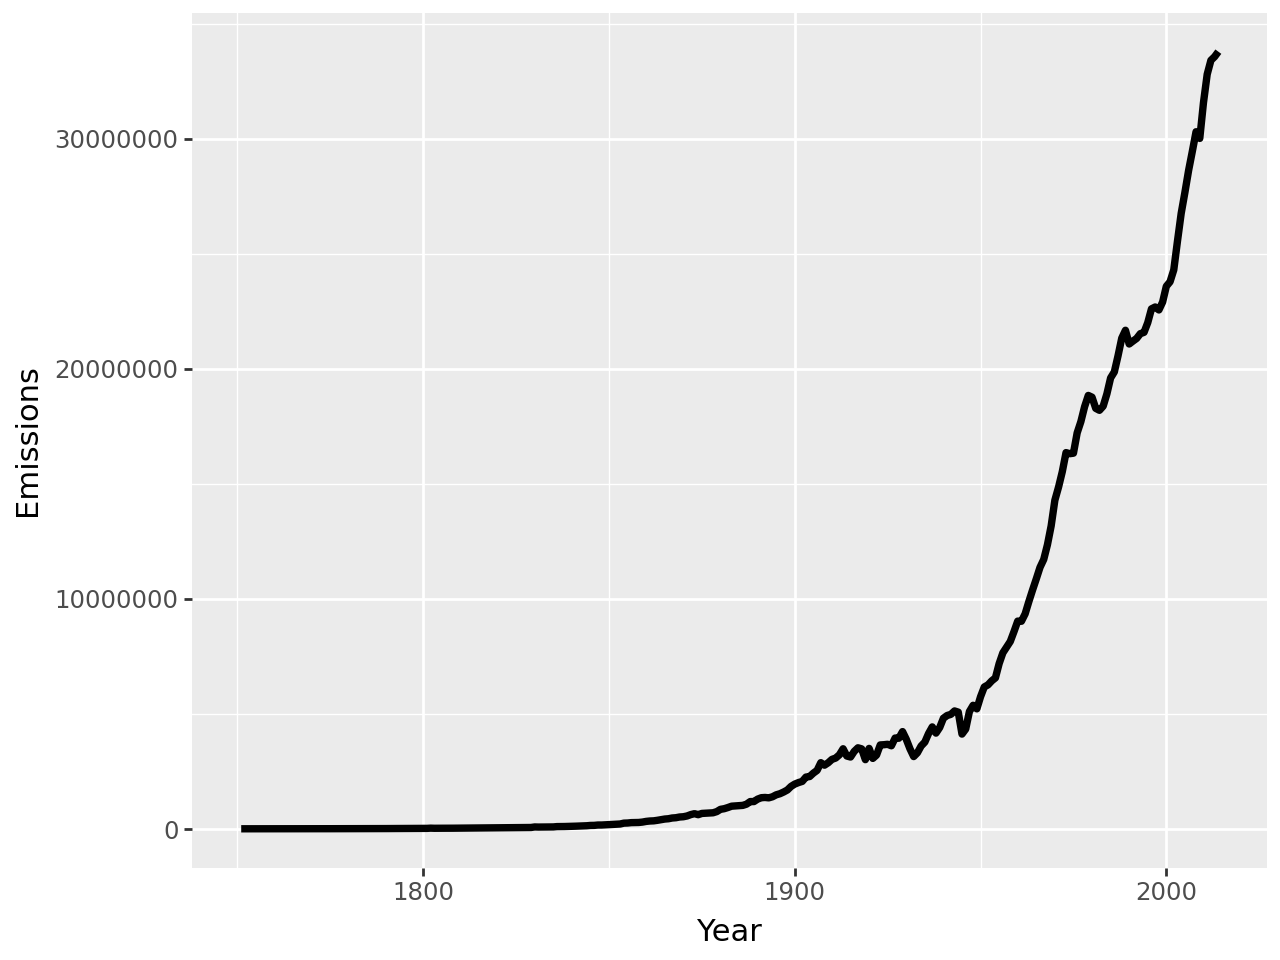

In [63]:
from plotnine import ggplot, aes, geom_line
import pandas as pd

emissions_by_year = (
    data_long[data_long["Indicator"] == "Emissions"]
    .groupby("Year")["Value"]
    .sum()
    .reset_index(name="Emissions")
)

(
    ggplot(emissions_by_year, aes(x="Year", y="Emissions"))
    + geom_line(size = 1.5)
)

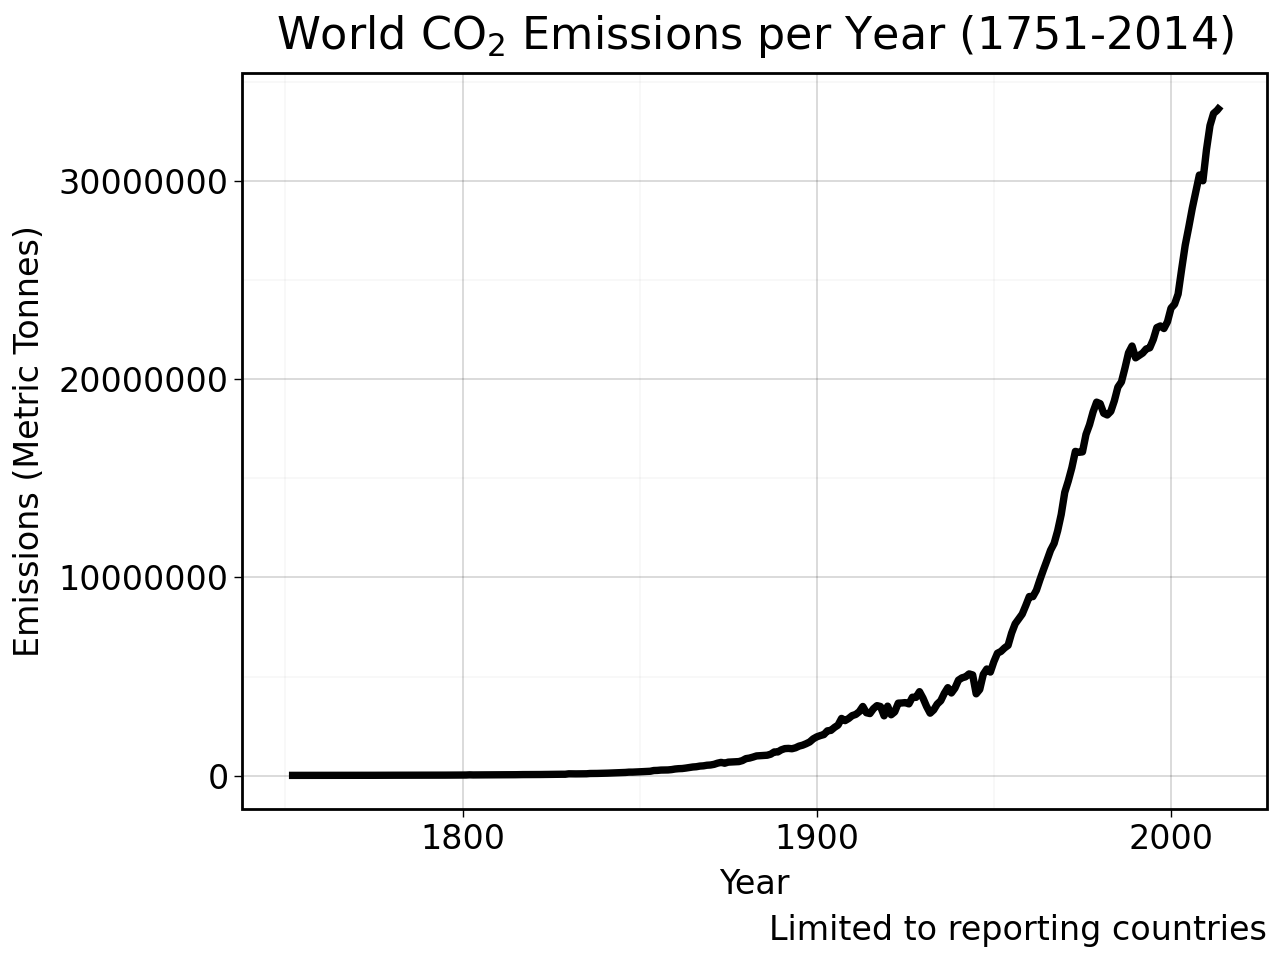

In [64]:
from plotnine import (
    ggplot, aes, geom_line, labs, theme_linedraw, theme,
    element_text
)

emissions_by_year = (
    data_long[data_long["Indicator"] == "Emissions"]
    .groupby("Year")["Value"]
    .sum()
    .reset_index(name="Emissions")
)

(
    ggplot(emissions_by_year, aes(x="Year", y="Emissions"))
    + geom_line(size=1.5)
    + labs(
        title="World CO$_2$ Emissions per Year (1751-2014)",
        caption="Limited to reporting countries",
        y="Emissions (Metric Tonnes)"
    )
    + theme_linedraw()
    + theme(
        axis_text_x=element_text(size=12),
        axis_text_y=element_text(size=12),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        plot_caption=element_text(size=12),
        plot_title=element_text(size=16)
    )
)

In [65]:
from plotnine import theme_linedraw, theme, element_text

my_theme = (
    theme_linedraw()
    + theme(
        axis_text_x=element_text(size=12),
        axis_text_y=element_text(size=12),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        plot_caption=element_text(size=12),
        plot_title=element_text(size=16)
    )
)

In [66]:
from plotnine import ggplot, aes, geom_line, labs

CO2_world = (
    data_long[data_long["Indicator"] == "Emissions"]
    .groupby("Year")["Value"]
    .sum()
    .reset_index(name="Emissions")
    .pipe(lambda df: 
          ggplot(df, aes(x="Year", y="Emissions"))
          + geom_line(size=1.5)
          + labs(
              title="World CO$_2$ Emissions per Year (1751-2014)",
              caption="Limited to reporting countries",
              y="Emissions (Metric Tonnes)"
          )
          + my_theme
         )
)

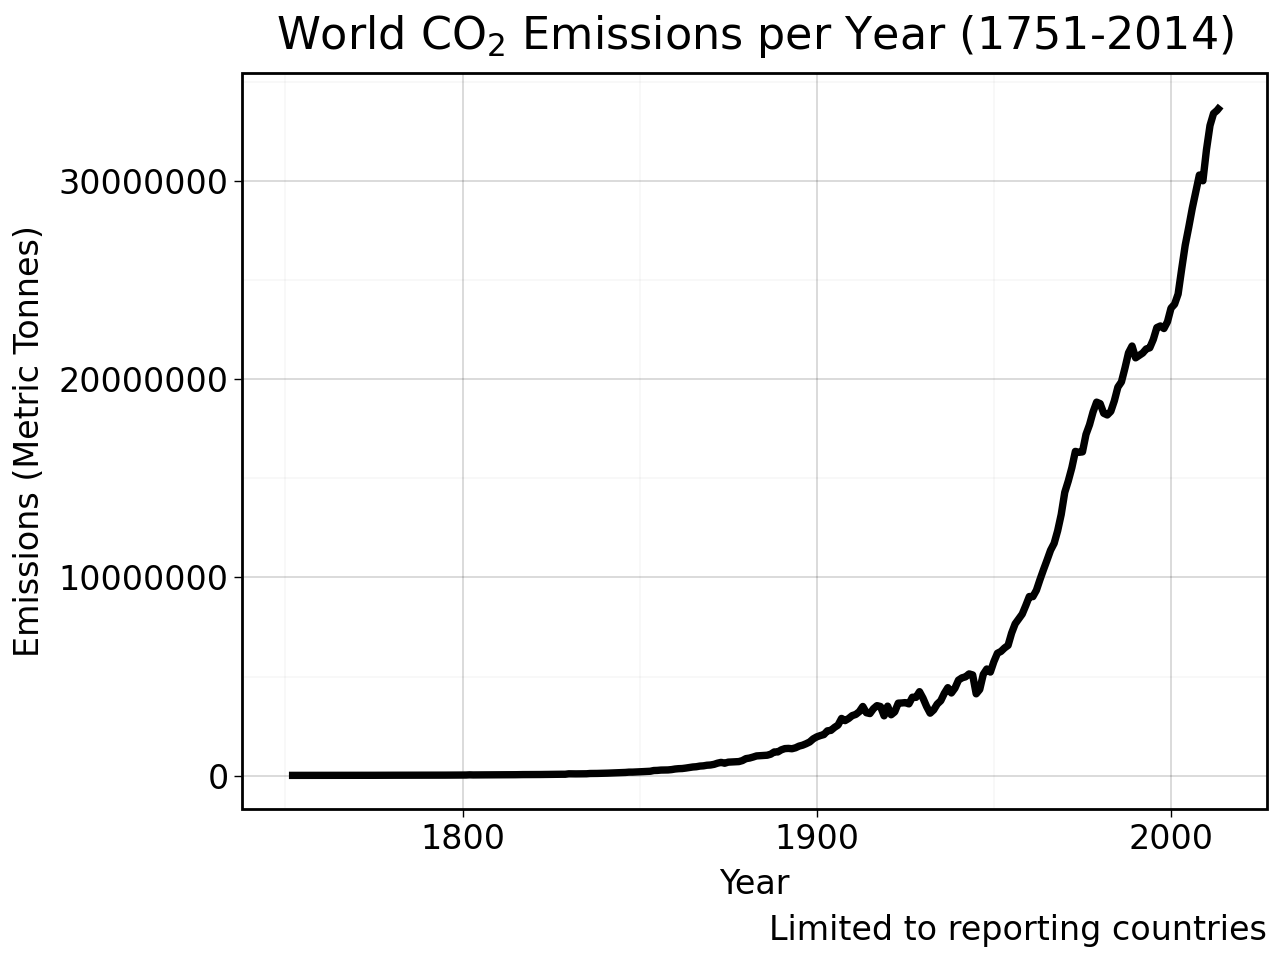

In [67]:
CO2_world

/srv/conda/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/srv/conda/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: plots/CO2_world.png


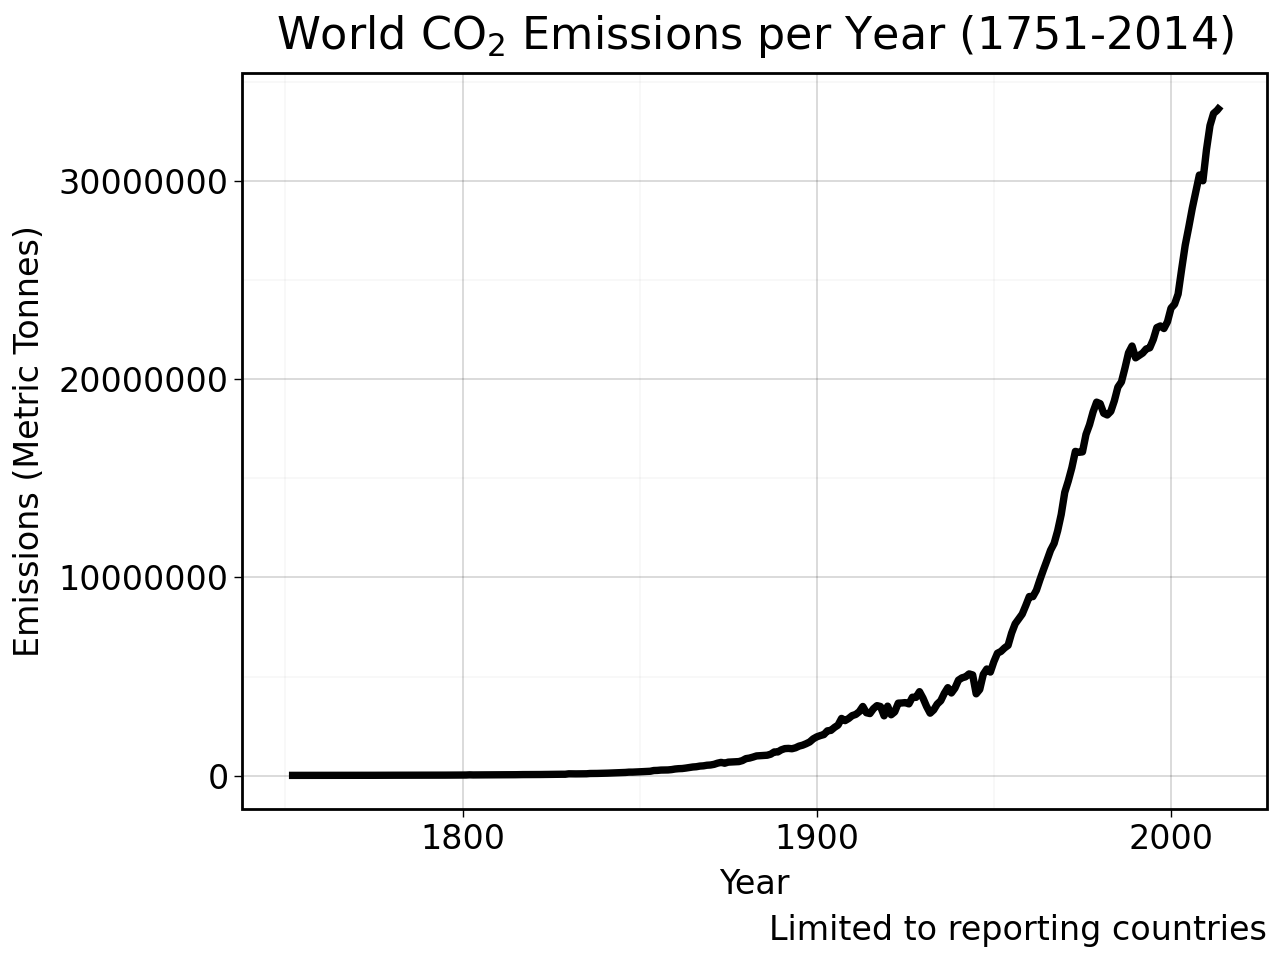

In [68]:
os.makedirs("plots", exist_ok=True)

CO2_world.save("plots/CO2_world.png", dpi=300)
CO2_world

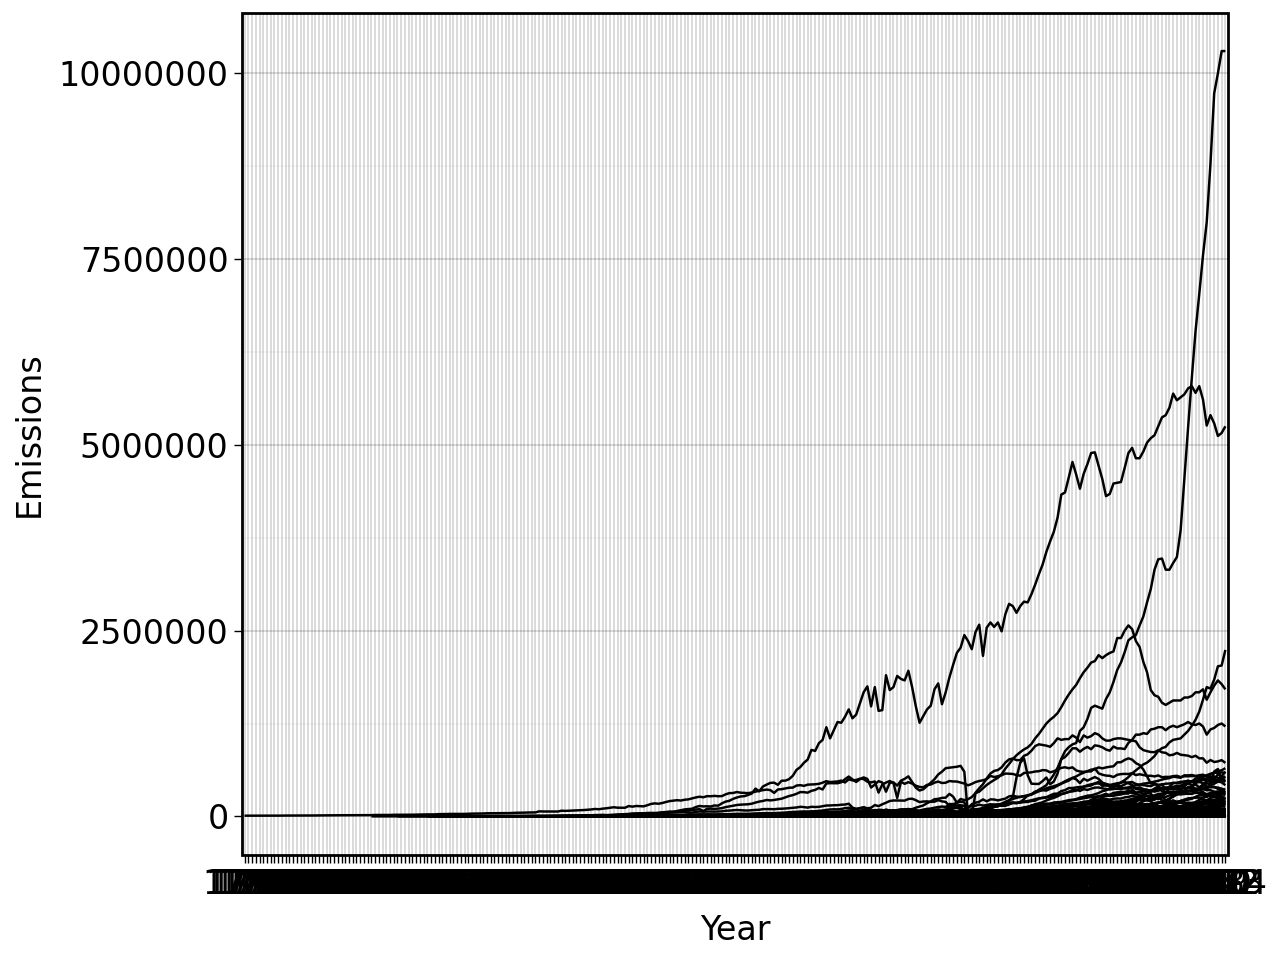

In [69]:
from plotnine import ggplot, aes, geom_line, ylab

(
    data_long[data_long["Indicator"] == "Emissions"]
    .pipe(lambda df: 
        ggplot(df, aes(x="Year", y="Value", group="Country"))
        + geom_line()
        + ylab("Emissions")
        + my_theme
    )
)

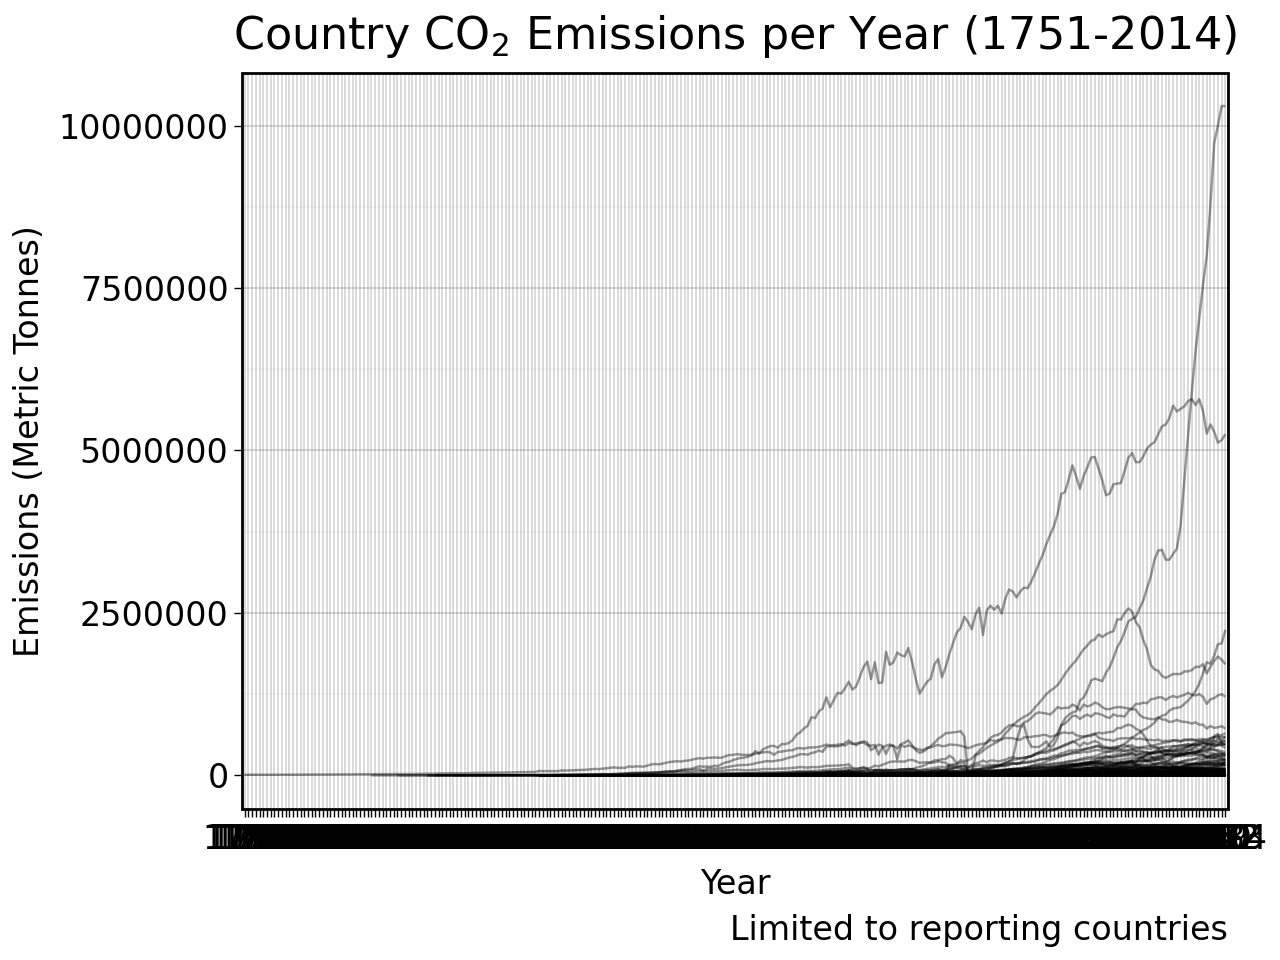

In [70]:
from plotnine import ggplot, aes, geom_line, labs

CO2_countries = (
    data_long[data_long["Indicator"] == "Emissions"]
    .pipe(lambda df: 
        ggplot(df, aes(x="Year", y="Value", group="Country"))
        + geom_line(alpha=0.4)
        + labs(
            title=r"Country CO$_2$ Emissions per Year (1751-2014)",
            caption="Limited to reporting countries",
            y="Emissions (Metric Tonnes)"
        )
        + my_theme
    )
)

CO2_countries

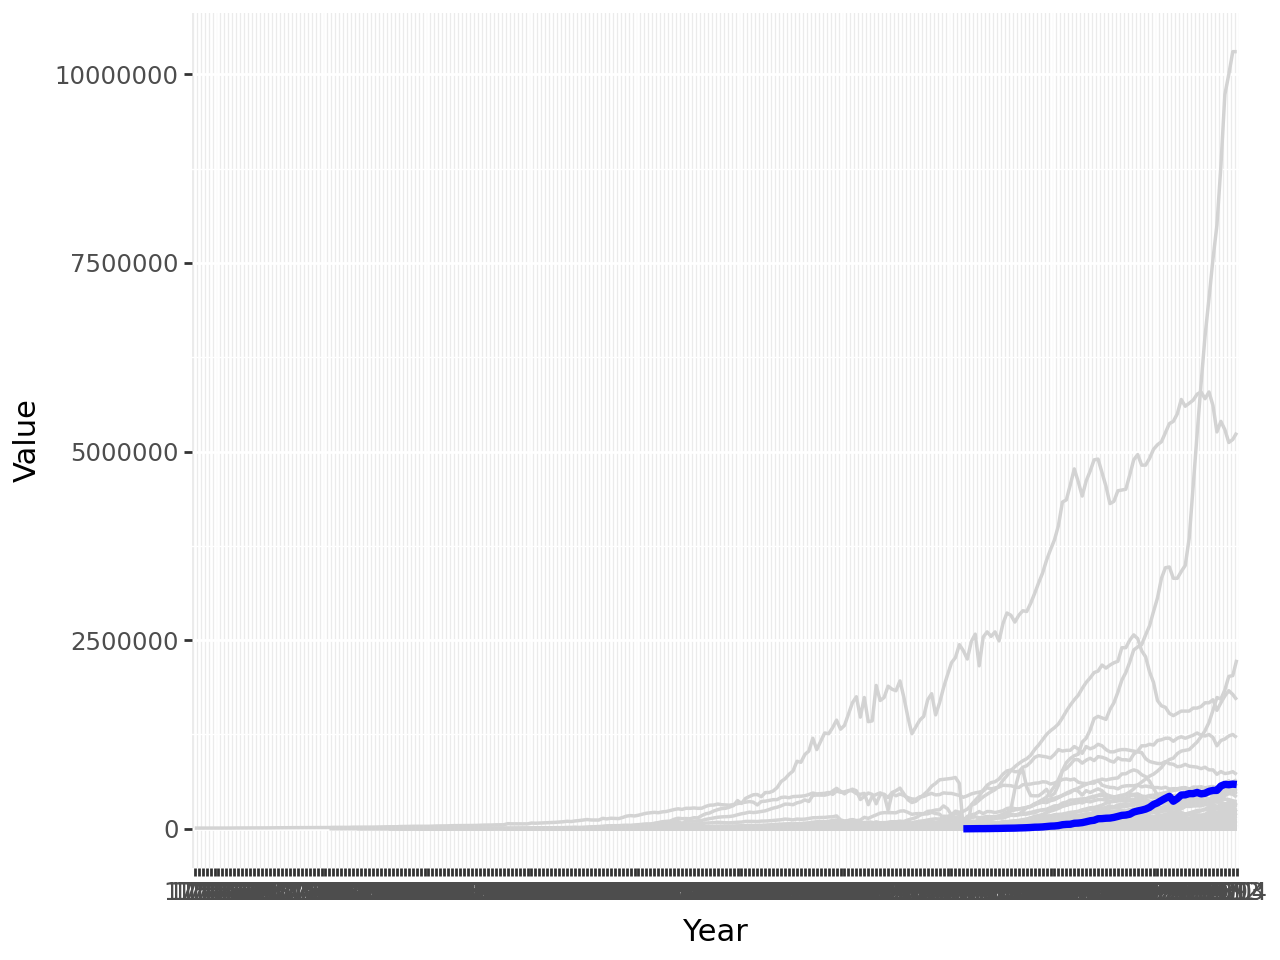

In [71]:
from plotnine import scale_color_manual, geom_line, aes

us_data = data_long[
    (data_long["Indicator"] == "Emissions")
]

(
    ggplot(us_data, aes(x="Year", y="Value", group="Country")) 
    + geom_line(color="lightgray", size=0.7)  # all countries in gray
    + geom_line(
        data=us_data[us_data["Country"] == "South Korea"],
        mapping=aes(x="Year", y="Value"),
        color="blue", size=1.5
    )
)

In [72]:
top_10_count = (
    data_long[(data_long["Indicator"] == "Emissions") & (data_long["Year"] == 2014)]
    .copy()
)

top_10_count["rank"] = top_10_count["Value"].rank(method="dense", ascending=False)
top_10_count = top_10_count[top_10_count["rank"] <= 10].sort_values("rank")

top_10_count

,Country,Year,Label,Indicator,Value,Region,rank
19059,China,2014,CO2 Emissions (Metric Tons),Emissions,10300000.0,Rest of the World,1.0
98317,United States,2014,CO2 Emissions (Metric Tons),Emissions,5250000.0,Rest of the World,2.0
40563,India,2014,CO2 Emissions (Metric Tons),Emissions,2240000.0,Rest of the World,3.0
75201,Russia,2014,CO2 Emissions (Metric Tons),Emissions,1710000.0,Rest of the World,4.0
44875,Japan,2014,CO2 Emissions (Metric Tons),Emissions,1210000.0,Rest of the World,5.0
34151,Germany,2014,CO2 Emissions (Metric Tons),Emissions,720000.0,Rest of the World,6.0
41641,Iran,2014,CO2 Emissions (Metric Tons),Emissions,649000.0,Rest of the World,7.0
77520,Saudi Arabia,2014,CO2 Emissions (Metric Tons),Emissions,601000.0,Rest of the World,8.0
83337,South Korea,2014,CO2 Emissions (Metric Tons),Emissions,587000.0,South Korea,9.0
16476,Canada,2014,CO2 Emissions (Metric Tons),Emissions,537000.0,Rest of the World,10.0


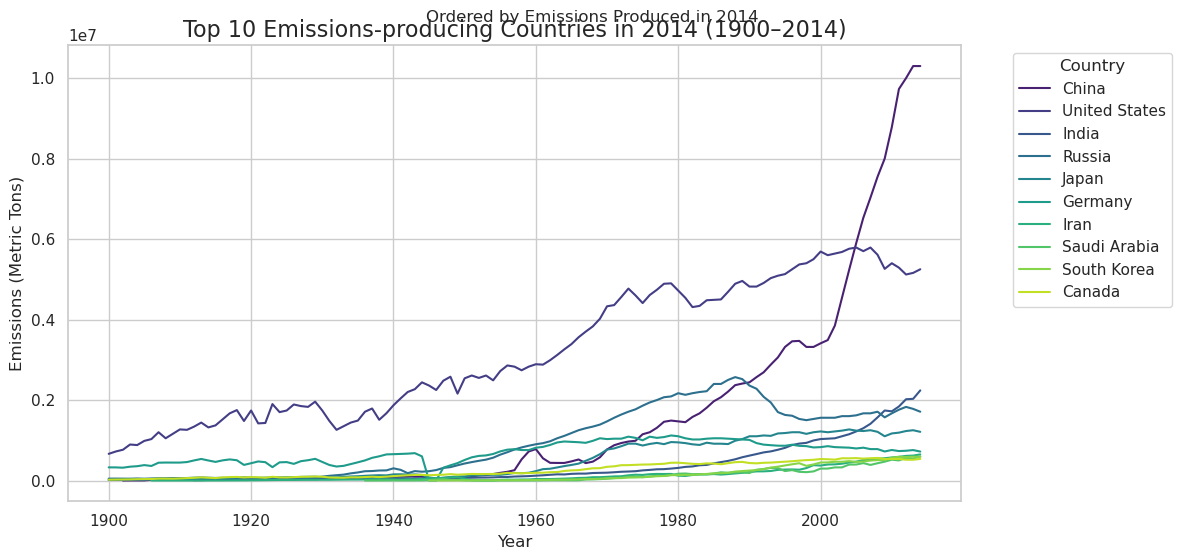

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_long["Year"] = pd.to_numeric(data_long["Year"], errors="coerce")
data_long["Value"] = pd.to_numeric(data_long["Value"], errors="coerce")
data_long = data_long.dropna(subset=["Year", "Value"])

top_10_count = (
    data_long[(data_long["Indicator"] == "Emissions") & (data_long["Year"] == 2014)]
    .copy()
)
top_10_count["rank"] = top_10_count["Value"].rank(method="dense", ascending=False)
top_10_count = top_10_count[top_10_count["rank"] <= 10].sort_values("rank")

top_10_countries = top_10_count["Country"].tolist()

top10b = data_long[
    (data_long["Country"].isin(top_10_countries)) &
    (data_long["Indicator"] == "Emissions") &
    (data_long["Year"] >= 1900)
]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=top10b,
    x="Year",
    y="Value",
    hue="Country",
    hue_order=top_10_countries,   # keeps legend in 2014 rank order
    palette="viridis"
)

plt.title("Top 10 Emissions-producing Countries in 2014 (1900–2014)", fontsize=16)
plt.suptitle("Ordered by Emissions Produced in 2014", fontsize=12, y=0.93)
plt.ylabel("Emissions (Metric Tons)")
plt.xlabel("Year")

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# using the past data and code above code first filters include only emissions data from the top 10 countries between 1900 and 2014 then shows how emissions changed over time for each country, with different colors representing each country the plot is set by the figure size, labeling the axes, and creating a better understandable plot.

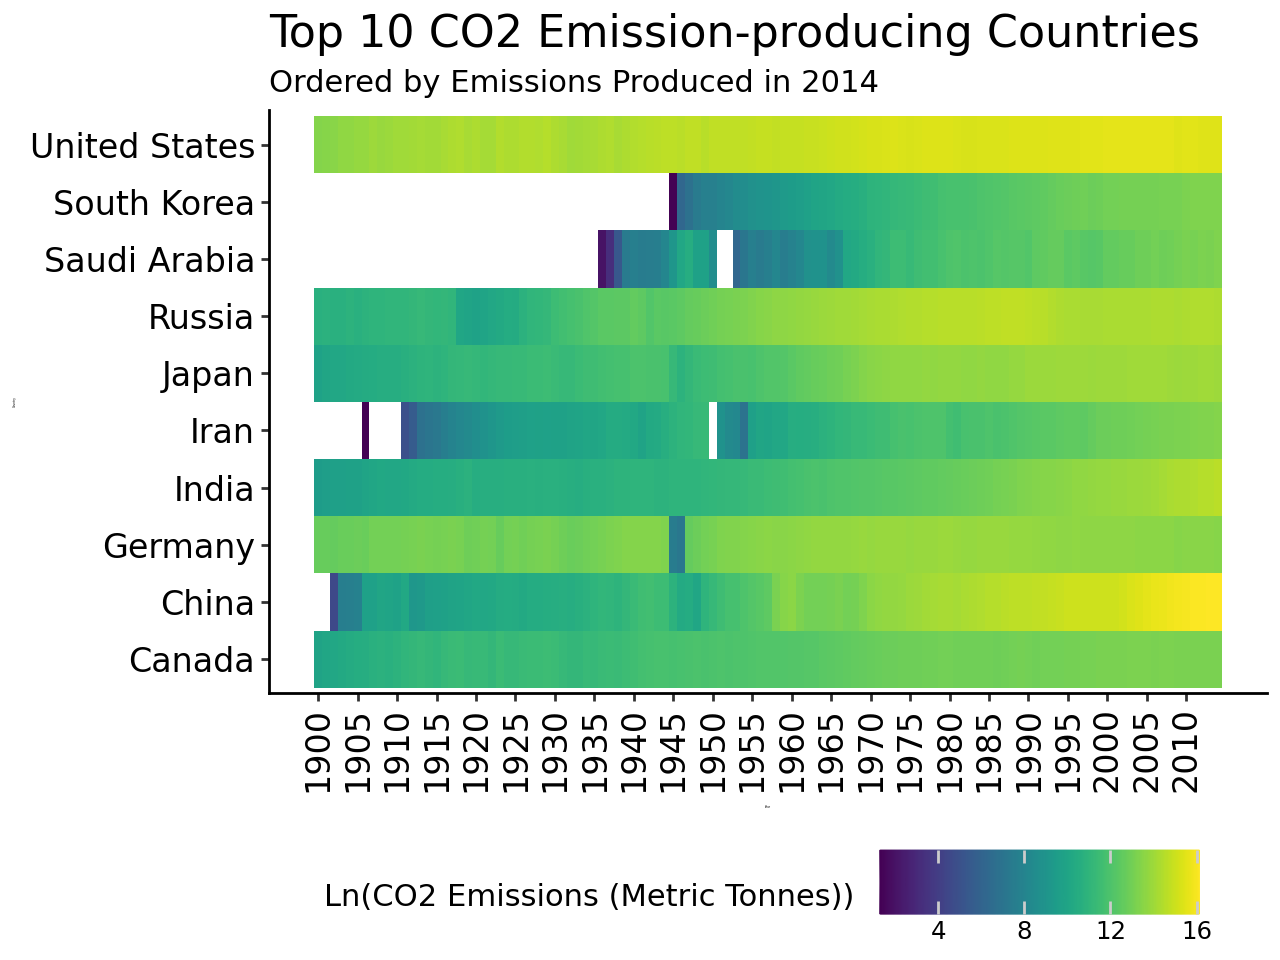

In [74]:
# Tiles

import numpy as np
import pandas as pd
from plotnine import (
    ggplot, aes, geom_tile, scale_fill_gradientn,
    scale_x_continuous, labs, theme_classic, theme, element_text
)
from matplotlib.cm import viridis
from pandas.api.types import CategoricalDtype

top_countries = top_10_count["Country"].tolist()

top10_data = (
    data_long[
        (data_long["Country"].isin(top_countries)) &
        (data_long["Indicator"] == "Emissions") &
        (data_long["Year"] >= 1900)
    ]
    .copy()
)

top10_data["log_Value"] = np.log(top10_data["Value"].replace(0, np.nan))

last_year = top10_data["Year"].max()
last_year_vals = top10_data[top10_data["Year"] == last_year][["Country", "Value"]]
ordered_countries = last_year_vals.sort_values("Value")["Country"]
cat_type = CategoricalDtype(categories=ordered_countries, ordered=True)
top10_data["Country"] = top10_data["Country"].astype(cat_type)
viridis_colors = [viridis(i) for i in np.linspace(0, 1, 256)]

Top10t = (
    ggplot(top10_data, aes(x="Year", y="Country")) +
    geom_tile(aes(fill="log_Value")) +
    scale_fill_gradientn(colors=viridis_colors) +
    scale_x_continuous(breaks=range(1900, 2015, 5), labels=range(1900, 2015, 5)) +
    labs(
        title="Top 10 CO2 Emission-producing Countries",
        subtitle="Ordered by Emissions Produced in 2014",
        fill="Ln(CO2 Emissions (Metric Tonnes))"
    ) +
    theme_classic() +
    theme(
        axis_text_x=element_text(size=12, angle=90, color="black"),
        axis_text_y=element_text(size=12, color="black"),
        axis_title_x=element_text(size=0),
        axis_title_y=element_text(size=0),
        plot_title=element_text(size=16),
        legend_position="bottom"
    )
)

Top10t

# code creates a heatmap of emissions over time for the top 10 countries laying out countries on the y-axis by their emissions in the last available year. Used plotnine to plot colored tiles with a Viridis gradient, customizes the x-axis labels to show years every 5 years.

In [75]:
os.makedirs("plots", exist_ok=True)

Top10t.save("plots/Top10t.png", dpi=300)

/srv/conda/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/srv/conda/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: plots/Top10t.png


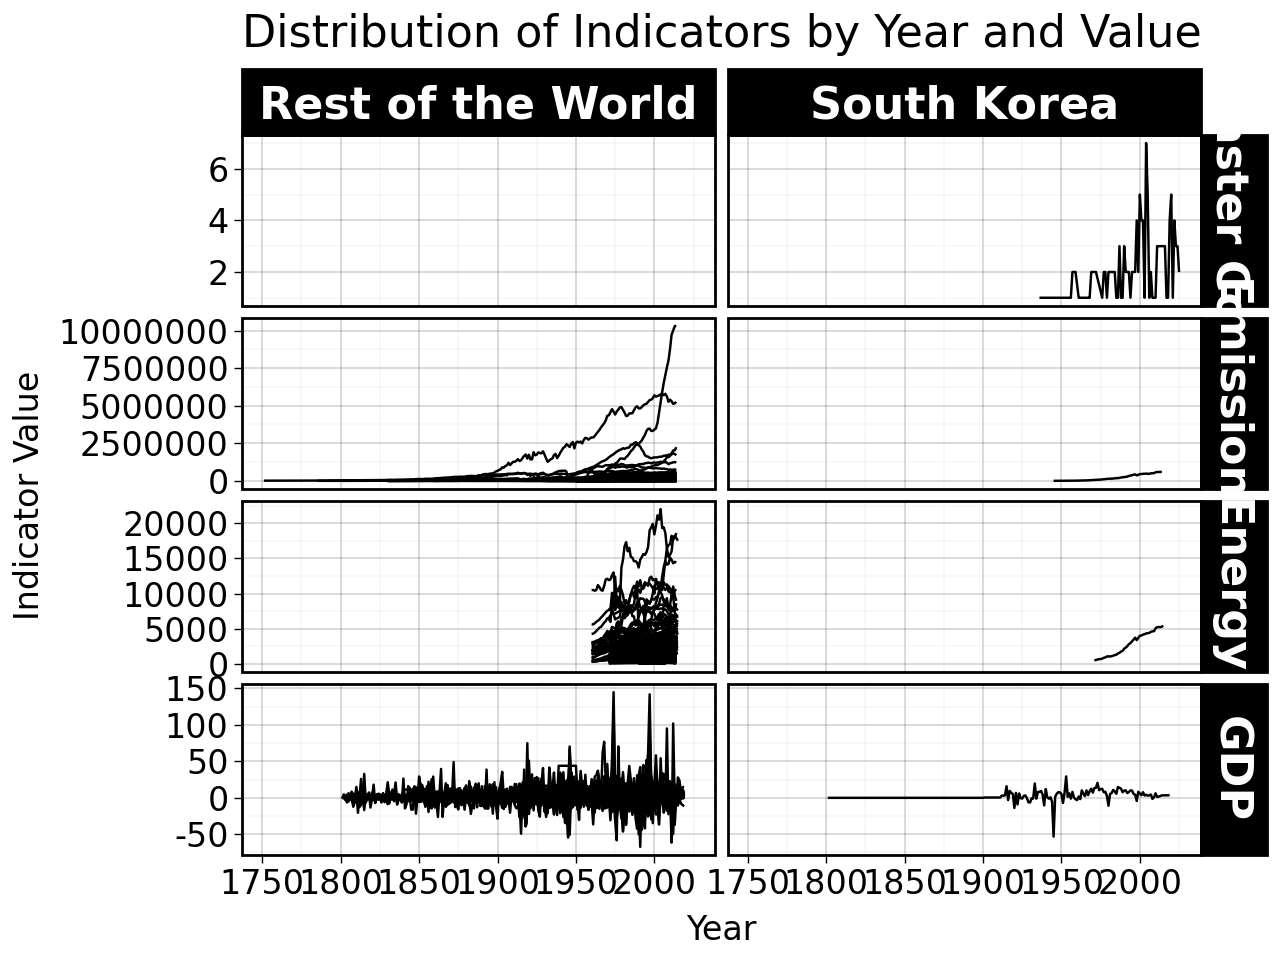

In [76]:
from plotnine import (
    ggplot, aes, geom_line, labs, theme, element_text,
    facet_grid
)
filtered_data = data_long[~data_long['Indicator'].isin(['Disasters', 'Temperature'])]

plot = (
    ggplot(filtered_data, aes(x='Year', y='Value', group='Country')) +
    geom_line() +
    facet_grid('Indicator ~ Region', scales='free_y') +
    labs(
        title='Distribution of Indicators by Year and Value',
        y='Indicator Value'
    ) +
    my_theme +  
    theme(
        strip_text=element_text(size=16, face='bold')
    )
)

plot

# The code filters out the disasters and temprature from the data above and used plotnine to plot each of the indicators over time grouped by country.

In [77]:
from plotnine import (
    ggplot, aes, geom_point, geom_smooth, scale_x_continuous,
    facet_wrap, theme_classic, theme, element_text, element_blank, labs
)

In [78]:
!pip install scikit-misc

  Using cached scikit_misc-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.0 kB)
Using cached scikit_misc-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (188 kB)


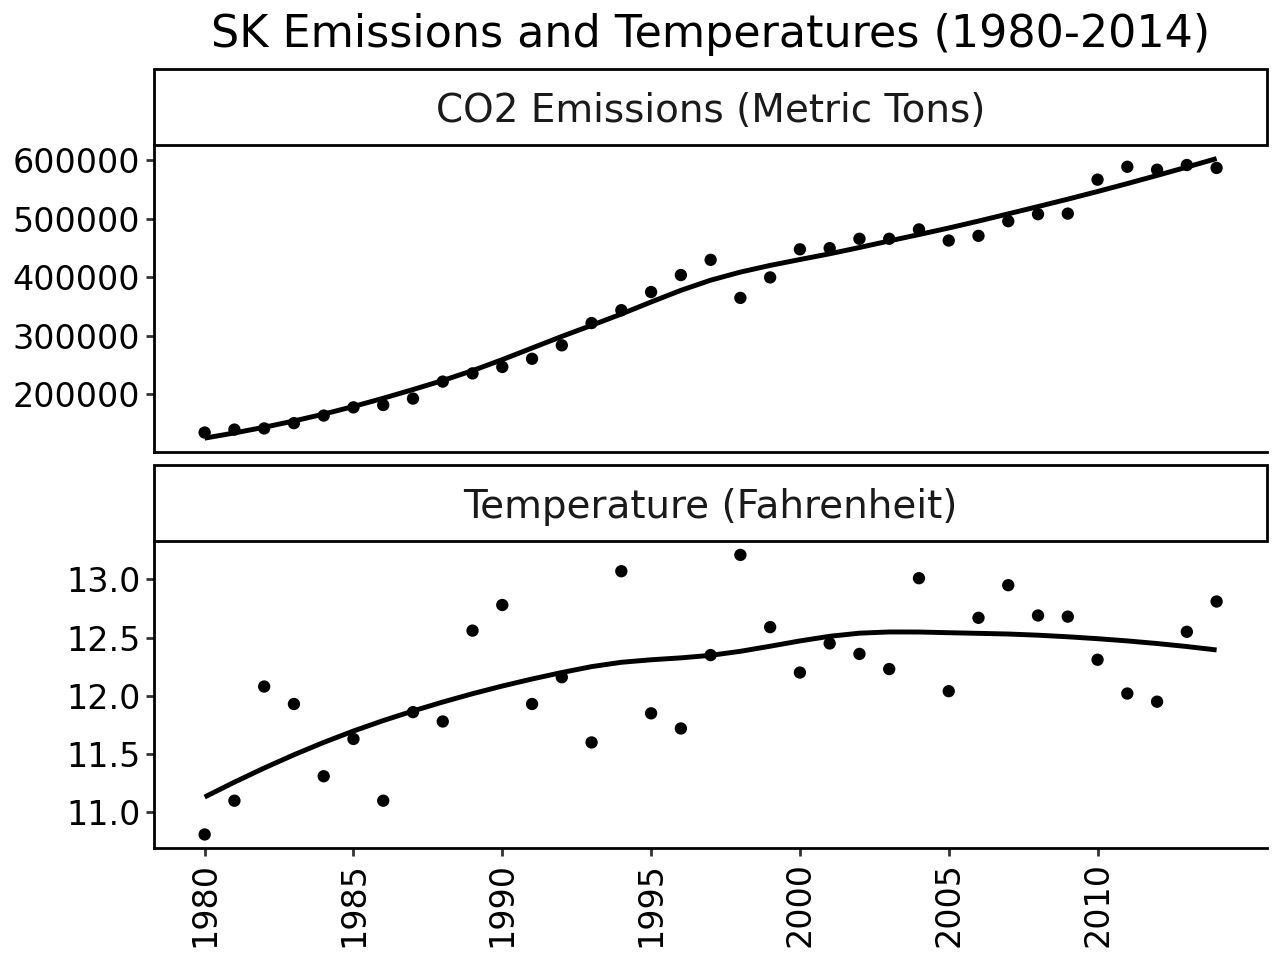

In [79]:
co2_temp_us_facet_data = (
    data_long[
        (data_long['Country'] == 'South Korea') &
        (data_long['Year'] >= 1980) &
        (data_long['Year'] <= 2014) &
        (data_long['Indicator'].isin(['Emissions', 'Temperature']))
    ]
)

CO2_temp_US_facet = (
    ggplot(co2_temp_us_facet_data, aes(x='Year', y='Value')) +
    geom_point() +
    geom_smooth(method='loess', se=False) +
    scale_x_continuous(breaks=range(1980, 2015, 5), labels=range(1980, 2015, 5)) +
    facet_wrap('~Label', scales='free_y', ncol=1) +
    theme_classic() +
    theme(
        axis_text_x=element_text(size=12, angle=90, color='black'),
        axis_text_y=element_text(size=12, color='black'),
        strip_text_x=element_text(size=14),
        axis_title=element_blank(),
        plot_title=element_text(size=16)
    ) +
    labs(title='SK Emissions and Temperatures (1980-2014)')
)

CO2_temp_US_facet

# code filters emissions and temperature data in the US from 1980 to 2014. Used plotnine to create a faceted plot showing trends over time with scatter points for each indicator.

In [80]:
CO2_temp_US_facet.save("plots/CO2_temp_US_facet.png", dpi=300, width=6.4, height=4.8, units='in')

/srv/conda/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/srv/conda/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: plots/CO2_temp_US_facet.png


In [103]:
us_filtered = data_long[
    (data_long['Country'] == 'South Korea') &
    (data_long['Year'] >= 1980) &
    (data_long['Year'] <= 2014)
].copy()

if 'Label' in us_filtered.columns:
    us_filtered = us_filtered.drop(columns=['Label'])

us_agg = us_filtered.groupby(['Year', 'Indicator'], as_index=False)['Value'].mean()

wide_US = us_agg.pivot(index='Year', columns='Indicator', values='Value').reset_index()

print(wide_US.head())

Indicator  Year  Disaster Count  Emissions  Energy    GDP  Temperature
0          1980             2.0   135000.0  1080.0 -11.00        10.81
1          1981             2.0   140000.0  1050.0   5.28        11.10
2          1982             2.0   142000.0  1100.0   6.25        12.08
3          1983             NaN   151000.0  1170.0  10.80        11.93
4          1984             2.0   164000.0  1260.0   8.75        11.31


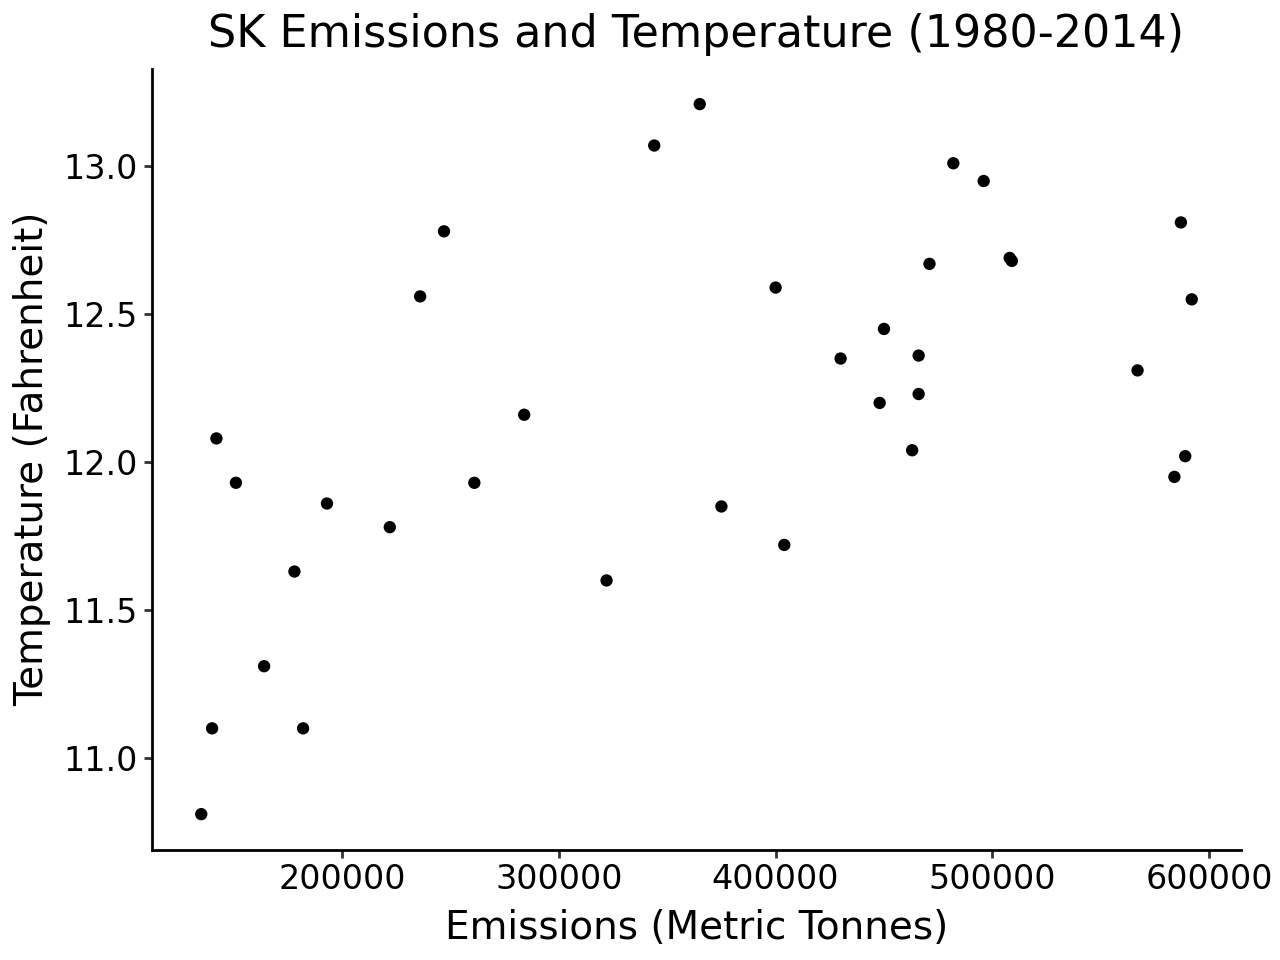

In [104]:
from plotnine import (
    ggplot, aes, geom_point, theme_classic,
    theme, element_text, labs
)

CO2_temp_US = (
    ggplot(wide_US, aes(x='Emissions', y='Temperature')) +
    geom_point() +
    theme_classic() +
    theme(
        axis_text_x=element_text(size=12, color='black'),
        axis_text_y=element_text(size=12, color='black'),
        axis_title=element_text(size=14),
        plot_title=element_text(size=16)
    ) +
    labs(
        title='SK Emissions and Temperature (1980-2014)',
        x='Emissions (Metric Tonnes)',
        y='Temperature (Fahrenheit)'
    )
)

CO2_temp_US


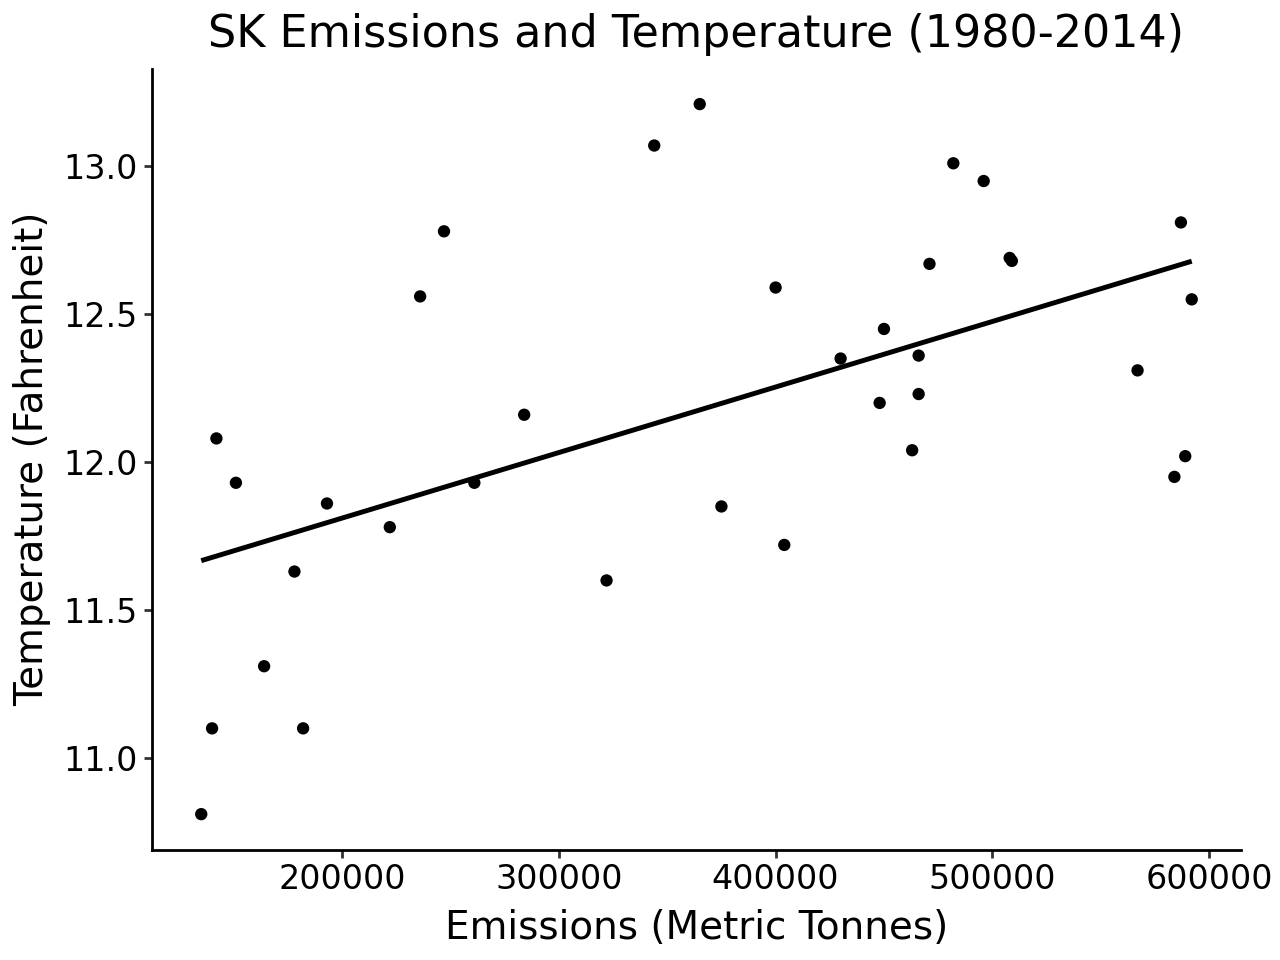

In [105]:
from plotnine import geom_smooth

CO2_temp_US = CO2_temp_US + geom_smooth(method='lm', se=False)

CO2_temp_US

# code uses linear regression smoothing layer using geom_smooth set to linear model without displaying the confidence interval showing the updated plot using linear trend lines for the data.

# **Data Analysis**

In [106]:
summary_stats = wide_US.agg({
    'Emissions': ['mean', 'std'],
    'Temperature': ['mean', 'std']
})

print(summary_stats)

Indicator      Emissions  Temperature
mean       367228.571429    12.181143
std        151678.469082     0.585791


In [107]:
print(wide_US.shape[0])

35


In [108]:
from scipy.stats import pearsonr

emissions = wide_US['Emissions']
temperature = wide_US['Temperature']

corr_coef, p_value = pearsonr(emissions, temperature)

print(f"Pearson correlation coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4e}")

Pearson correlation coefficient: 0.5735
P-value: 3.1655e-04


In [109]:
corr_coef, p_value = pearsonr(wide_US['Emissions'], wide_US['Temperature'])

tidy_corr = pd.DataFrame({
    'estimate': [corr_coef],
    'statistic': [None],  
    'p.value': [p_value],
    'method': ['Pearson correlation test'],
    'alternative': [None]
})

print(tidy_corr)

   estimate statistic   p.value                    method alternative
0  0.573489      None  0.000317  Pearson correlation test        None


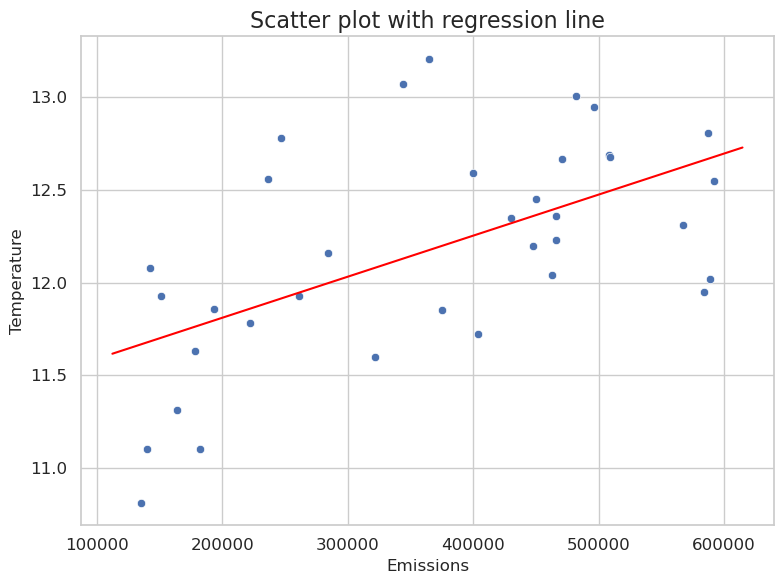

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mu_x = wide_US['Emissions'].mean()
sd_x = wide_US['Emissions'].std()
mu_y = wide_US['Temperature'].mean()
sd_y = wide_US['Temperature'].std()
rho = wide_US['Emissions'].corr(wide_US['Temperature'])

slope = rho * sd_y / sd_x
intercept = mu_y - slope * mu_x

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))

sns.scatterplot(data=wide_US, x='Emissions', y='Temperature')

x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red')

plt.xlabel('Emissions', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Scatter plot with regression line', fontsize=16)

plt.tight_layout()
plt.show()

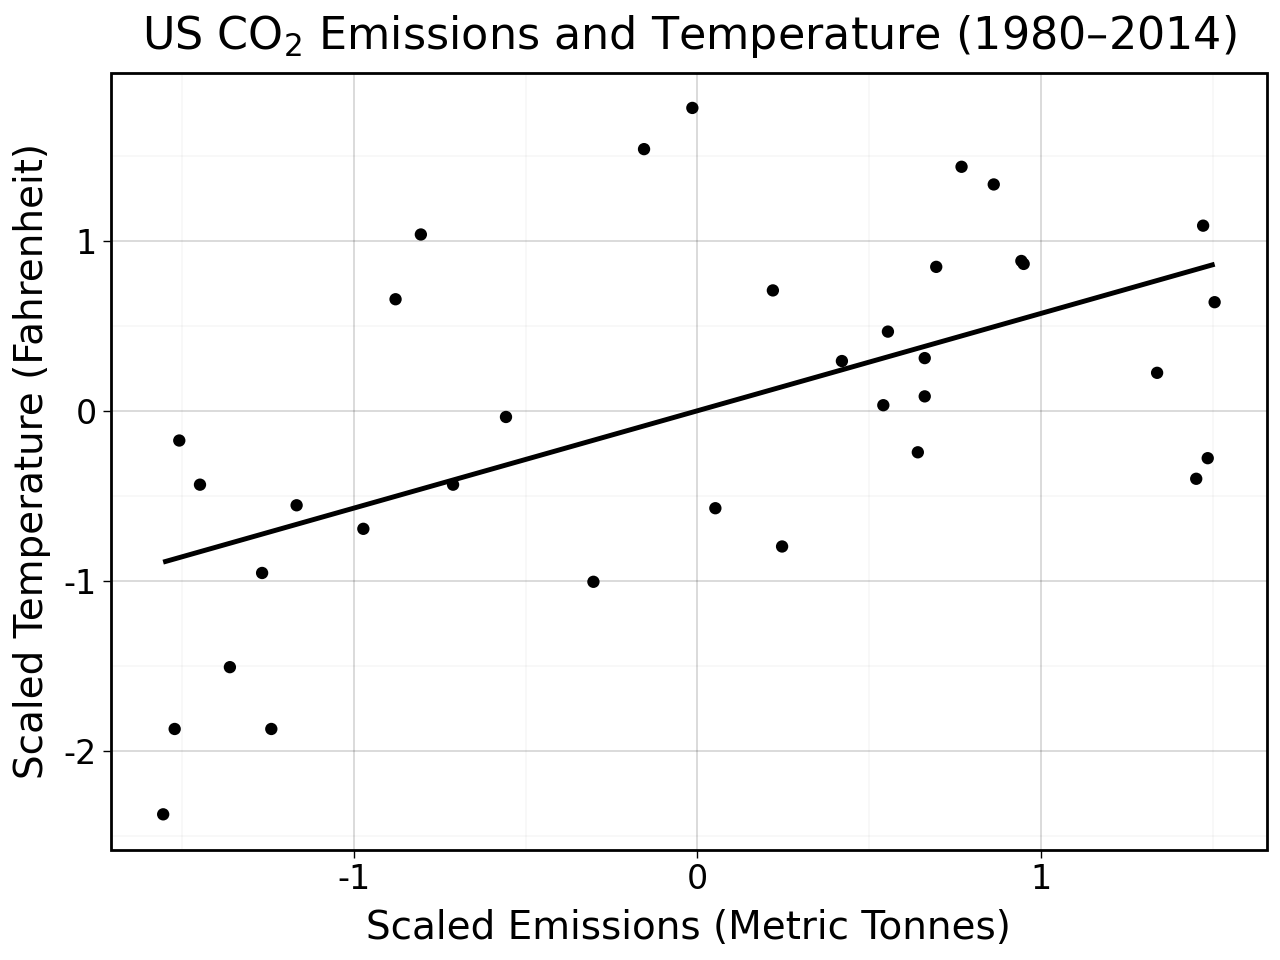

In [111]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, theme_linedraw, theme, element_text
from sklearn.preprocessing import scale  

wide_US['Emissions_scaled'] = scale(wide_US['Emissions'])
wide_US['Temperature_scaled'] = scale(wide_US['Temperature'])

CO2_temp_US_scaled = (
    ggplot(wide_US, aes(x='Emissions_scaled', y='Temperature_scaled'))
    + geom_point()
    + geom_smooth(method='lm', se=False)
    + labs(
        title=r'US CO$_2$ Emissions and Temperature (1980–2014)',
        x='Scaled Emissions (Metric Tonnes)',
        y='Scaled Temperature (Fahrenheit)'
    )
    + theme_linedraw()
    + theme(
        axis_text_x=element_text(size=12),
        axis_text_y=element_text(size=12),
        axis_title_x=element_text(size=14),
        axis_title_y=element_text(size=14),
        plot_caption=element_text(size=12),
        plot_title=element_text(size=16)
    )
)

CO2_temp_US_scaled

#relationship between correlation and linear regression: scaled the US emissions and temperature data to put them on the same standardized scale, then created a scatterplot of the scaled values with a linear trend line using plotnine

In [112]:
from plotnine import ggplot
import matplotlib.pyplot as plt

CO2_temp_US_scaled.save("plots/CO2_temp_US_scaled.png", dpi=300, width=6.4, height=4.8, units='in')

/srv/conda/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/srv/conda/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: plots/CO2_temp_US_scaled.png


# **Summary**

In [113]:
"plots/CO2_world.png"
"plots/Top10t.png"
"plots/CO2_temp_US.png"
"plots/CO2_temp_US_scaled.png"

'plots/CO2_temp_US_scaled.png'

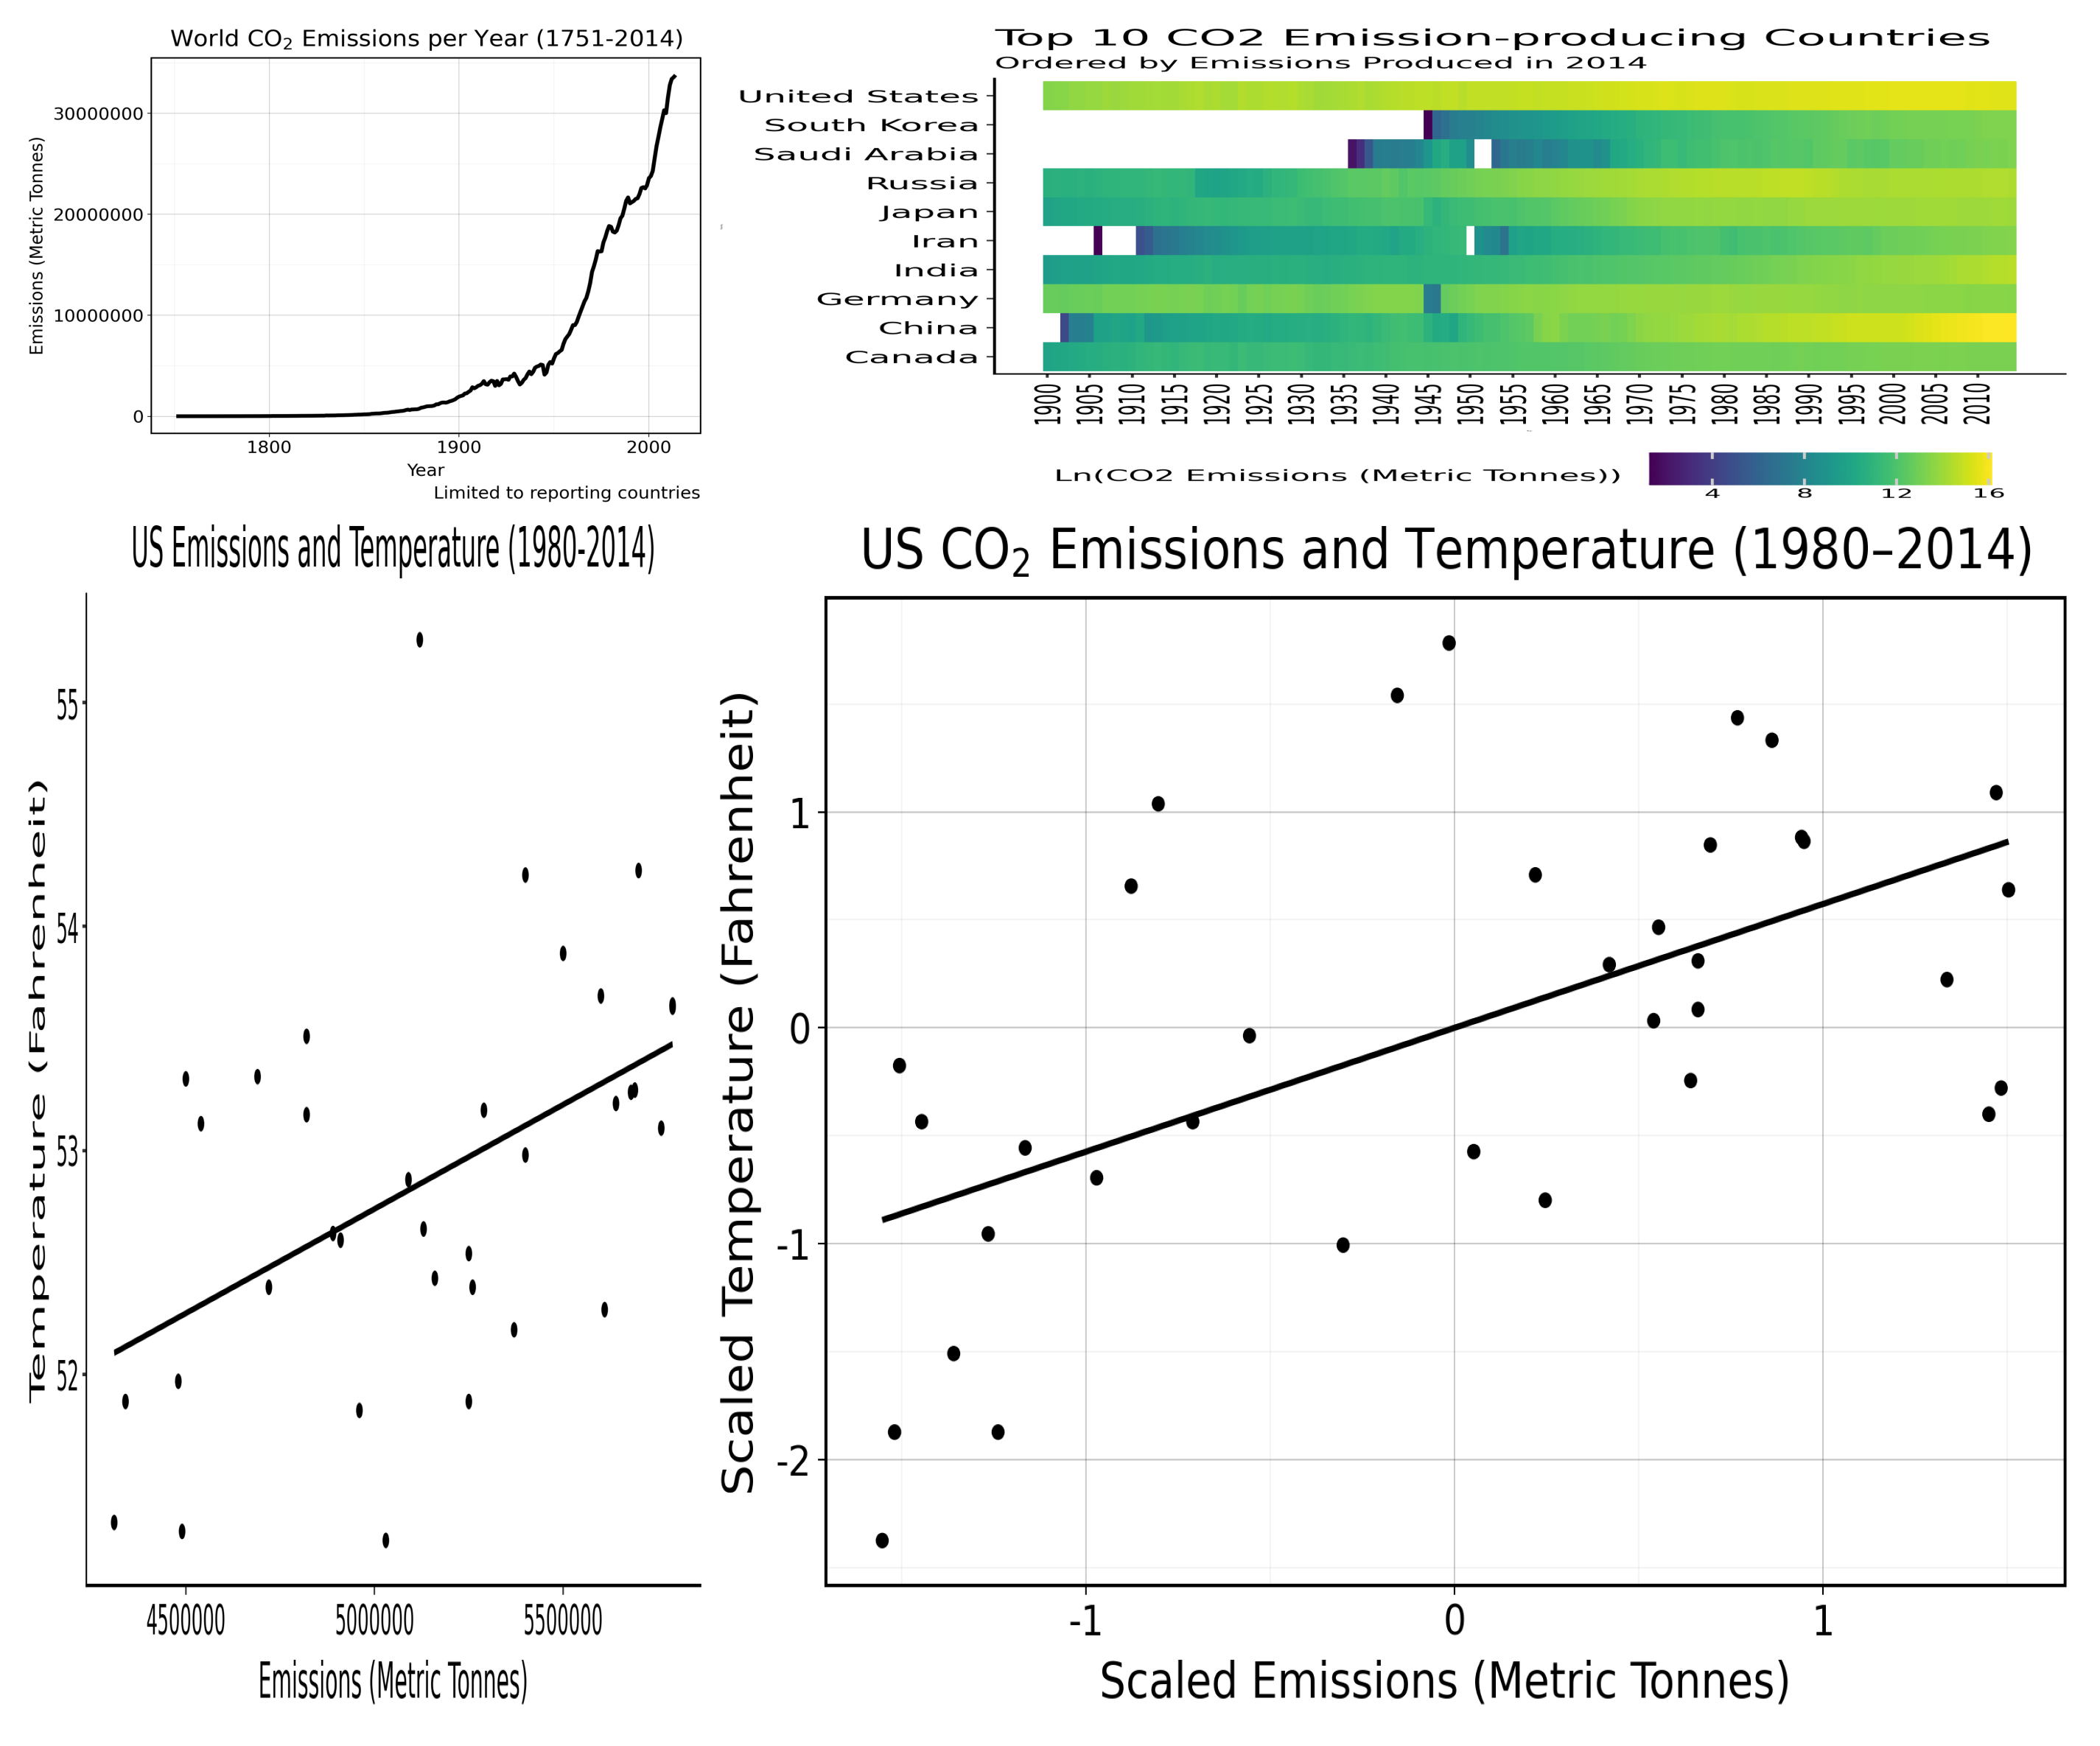

In [114]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

os.makedirs("img", exist_ok=True)

images = []
for fname in ['CO2_world.png', 'Top10t.png', 'CO2_temp_US.png', 'CO2_temp_US_scaled.png']:
    path = os.path.join('plots', fname)
    images.append(Image.open(path))

fig = plt.figure(figsize=(12, 10), dpi=300)
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1, 2],
                       height_ratios=[4/2.54, 10/2.54],
                       figure=fig)

axes = [fig.add_subplot(gs[i]) for i in range(4)]

for ax, img in zip(axes, images):
    ax.imshow(img, aspect='auto')
    ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("img/mainplot.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

#create a plot that summarizes our major findings: placing each image in its correct place and removing the axes so the images appear was well and saving it as a final file